In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from scipy import stats
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML
from collections import Counter
from sklearn.metrics import confusion_matrix
from pyvis.network import Network
import networkx as nx
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# Color Palettes for Fitzpatrick Skin Types

palette1 = "#F6CFB1"
palette2 = "#E8B590"
palette3 = "#D29F7C"
palette4 = "#BB7952"
palette5 = "#A55E2B"
palette6 = "#3B1E1A"

# More Color Palettes

p1a = "#689AB8"
p1a_special = "#447390"
p2a = "#0048A4"
p3a = "#E08955"
p3a_special = "#c56024"
p4a = "#E35A01"

p1b = "#0080bf"
p2b = "#55d0ff"
p3b = "#ccf9ff"

p1c = "#fa4d56"
p2c = "#4589ff"
p3c = "#08bdba"
p4c = "#d4bbff"

p1 = "#e3342f"
p2 = "#f6993f"
p3 = "#ffed4a"
p4 = "#38c172"
p5 = "#4dc0b5"
p6 = "#3490dc"
p7 = "#6574cd"
p8 = "#9561e2"
p9 = "#f66d9b"

p1d = "#d12771"
p2d = "#bae6ff"

/Users/heart/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/Users/heart/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


In [2]:
df = pd.read_csv("clean_data/pmp_experiment_data.csv")

# Create Subsets of the Data

In [3]:
df_r1 = df[(df.guess_round==1) & (df.total_seen>=10) & (df.differential_1!="test")
         & (df.seen<=10) & (df.seen>1) & (df.attention_check==1)]

df_r2 = df[(df.guess_round==2) & (df.total_seen>=10) & (df.differential_1!="test")
         & (df.seen<=10) & (df.seen>1) & (df.attention_check==1)]

df_r2["no_update_x"] = (df_r2["no update"].astype(str) == "True") | (df_r2["no update"].astype(str) == "1")



bcd = df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (df.total_seen>=10) 
         & (df.seen<=10) & (df.seen>1) & (df.guess_round==1) & (df.differential_1!="test")
        & (df.attention_check==1)]

bcd_usa = df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (df.total_seen>=10) 
         & (df.seen<=10) & (df.seen>1) & (df.guess_round==1) & (df.differential_1!="test")
        & (df.attention_check==1) & ((df.country=="United States") | (df.country=="United States of America"))]

pcp = df[(df.physician_type=="PCP physician (MD or DO)") & (df.seen<=10) & (df.seen>1) &  
         (df.total_seen>=10) & (df.guess_round==1)& (df.differential_1!="test")
        & (df.attention_check==1)]

pcp_usa = df[(df.physician_type=="PCP physician (MD or DO)") & (df.seen<=10) & (df.seen>1) &  
         (df.total_seen>=10) & (df.guess_round==1)& (df.differential_1!="test")
        & (df.attention_check==1) & ((df.country=="United States") | (df.country=="United States of America"))]


d_res = df[(df.physician_type=="Dermatology resident (MD or DO)") & (df.seen<=10) & (df.seen>1) &  
         (df.total_seen>=10) & (df.guess_round==1)& (df.differential_1!="test")
        & (df.attention_check==1)]


other_p = df[(df.physician_type=="Other physician (MD or DO)") & (df.seen<=10) & (df.seen>1) &  
         (df.total_seen>=10) & (df.guess_round==1)& (df.differential_1!="test")
        & (df.attention_check==1) ]

d_res_usa = df[(df.physician_type=="Dermatology resident (MD or DO)") & (df.seen<=10) & (df.seen>1) &  
         (df.total_seen>=10) & (df.guess_round==1)& (df.differential_1!="test")
        & (df.attention_check==1)& ((df.country=="United States") | (df.country=="United States of America"))]


other_p_usa = df[(df.physician_type=="Other physician (MD or DO)") & (df.seen<=10) & (df.seen>1) &  
         (df.total_seen>=10) & (df.guess_round==1)& (df.differential_1!="test")
        & (df.attention_check==1) & ((df.country=="United States") | (df.country=="United States of America"))]

bcd_2 = df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (df.total_seen>=10) 
         & (df.seen<=10) & (df.seen>1) & (df.guess_round==2) & (df.differential_1!="test")
        & (df.attention_check==1)]
pcp_2 = df[(df.physician_type=="PCP physician (MD or DO)") & (df.seen<=10) & (df.seen>1) & 
         (df.total_seen>=10) & (df.guess_round==2) & (df.differential_1!="test")
        & (df.attention_check==1)]
d_res_2 = df[(df.physician_type=="Dermatology resident (MD or DO)") & (df.seen<=10) & (df.seen>1) & 
         (df.total_seen>=10) & (df.guess_round==2) & (df.differential_1!="test")
        & (df.attention_check==1)]
other_p_2 = df[(df.physician_type=="Other physician (MD or DO)") & (df.seen<=10) & (df.seen>1) & 
         (df.total_seen>=10) & (df.guess_round==2) & (df.differential_1!="test")
        & (df.attention_check==1)]




# print(bcd.shape)
# print(bcd.user_id.nunique())

# print(pcp.shape)
# print(pcp.user_id.nunique())

# print(d_res.shape)
# print(d_res.user_id.nunique())

# print(other_p.shape)
# print(other_p.user_id.nunique())



df_r2["predicted_label"] = ""
df_r2.loc[df_r2.predicted_label_numeric==0, "predicted_label"] = 'Atopic Dermatitis'
df_r2.loc[df_r2.predicted_label_numeric==1, "predicted_label"] = 'Lichen Planus'
df_r2.loc[df_r2.predicted_label_numeric==2, "predicted_label"] = 'Dermatomyositis'
df_r2.loc[df_r2.predicted_label_numeric==3, "predicted_label"] = 'Pityriasis Rosea'
df_r2.loc[df_r2.predicted_label_numeric==4, "predicted_label"] = 'Pityriasis Rubra Pilaris'
df_r2.loc[df_r2.predicted_label_numeric==5, "predicted_label"] = 'CTCL'
df_r2.loc[df_r2.predicted_label_numeric==6, "predicted_label"] = 'Lyme'
df_r2.loc[df_r2.predicted_label_numeric==7, "predicted_label"] = 'Secondary Syphilis'
df_r2.loc[df_r2.predicted_label_numeric==8, "predicted_label"] = 'Additional'
df_r2["ccc"] = ""
df_r2.loc[df_r2.prediction_correct==1, "ccc"] = "Correct Prediction"
df_r2.loc[df_r2.prediction_correct==0, "ccc"] = "Inorrect Prediction"

df_r2["incorrect_diagnoses"] = 0
df_r2.loc[(df_r2.differential_1.isna()==False) & (df_r2.diff1==0), "incorrect_diagnoses"] = df_r2["incorrect_diagnoses"] + 1
df_r2.loc[(df_r2.differential_2.isna()==False) & (df_r2.diff2==0),  "incorrect_diagnoses"] = df_r2["incorrect_diagnoses"] + 1
df_r2.loc[(df_r2.differential_3.isna()==False) & (df_r2.diff3==0),  "incorrect_diagnoses"] = df_r2["incorrect_diagnoses"] + 1

df_r2["incorrect_diagnoses_dls"] = df_r2["incorrect_diagnoses"]
df_r2.loc[(df_r2.prediction_correct==0) & (df_r2.update_differential==0),  "incorrect_diagnoses_dls"] = df_r2["incorrect_diagnoses_dls"] + 1

df_r2["incorrect_diagnoses_t1"] = 0
df_r2.loc[(df_r2.differential_1.isna()==False) & (df_r2.diff1==0), "incorrect_diagnoses_t1"] = df_r2["incorrect_diagnoses_t1"] + 1

df_r2["incorrect_diagnoses_t2"] = 0
df_r2.loc[(df_r2.differential_1.isna()==False) & (df_r2.diff1==0), "incorrect_diagnoses_t2"] = df_r2["incorrect_diagnoses_t2"] + 1
df_r2.loc[(df_r2.differential_2.isna()==False) & (df_r2.diff2==0),  "incorrect_diagnoses_t2"] = df_r2["incorrect_diagnoses_t2"] + 1

# Figures

## Figure 2

[0.27307692307692305, 0.2423728813559322, 0.13221153846153846, 0.12239902080783353]
[0.07163461538461538, 0.06610169491525424, 0.025240384615384616, 0.030599755201958383]
[0.027403846153846154, 0.03898305084745763, 0.01201923076923077, 0.0073439412484700125]


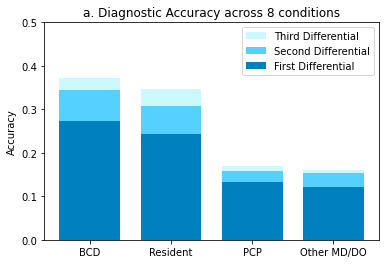

In [4]:
labels = ['Dermatologist', 'Resident', 'Other', 'PCP']
d1_means = [df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff1x.mean(), 
            df[(df.physician_type=="Dermatology resident (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff1x.mean(),
           df[(df.physician_type=="PCP physician (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff1x.mean(), 
            df[(df.physician_type=="Other physician (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff1x.mean(), ]
           
d2_means = [df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff2x.mean(), 
            df[(df.physician_type=="Dermatology resident (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff2x.mean(),
           df[(df.physician_type=="PCP physician (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff2x.mean(), 
            df[(df.physician_type=="Other physician (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff2x.mean(), 
          ]
d3_means = [df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff3x.mean(), 
            df[(df.physician_type=="Dermatology resident (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff3x.mean(),
             df[(df.physician_type=="PCP physician (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff3x.mean(),
           df[(df.physician_type=="Other physician (MD or DO)")
               & (df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
              ].diff3x.mean(), 
           ]
print(d1_means)
print(d2_means)
print(d3_means)

men_std = [2, 3, 4, 1]
women_std = [3, 5, 3, 3]
width = 0.75       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()
ax.bar(labels, d3_means, width, 
       bottom=[d2_means[0]+d1_means[0],d2_means[1]+d1_means[1],d2_means[2]+d1_means[2],d2_means[3]+d1_means[3]],
       label='Third Differential', color=p3b)
ax.bar(labels, d2_means, width, 
       bottom=d1_means,
       label='Second Differential', color=p2b)
ax.bar(labels, d1_means, width, 
       label='First Differential', color=p1b)

ax.set_ylabel('Accuracy')
# ax.set_title('Scores by group and gender')
ax.legend()
plt.ylim(0,.5)
ax.set_title("{}".format("a. Diagnostic Accuracy across 8 conditions"))
ax.set_xticklabels(["BCD","Resident","PCP","Other MD/DO"])

plt.show()
fig.savefig("figs/f1_a.png",dpi=600, bbox_inches="tight")

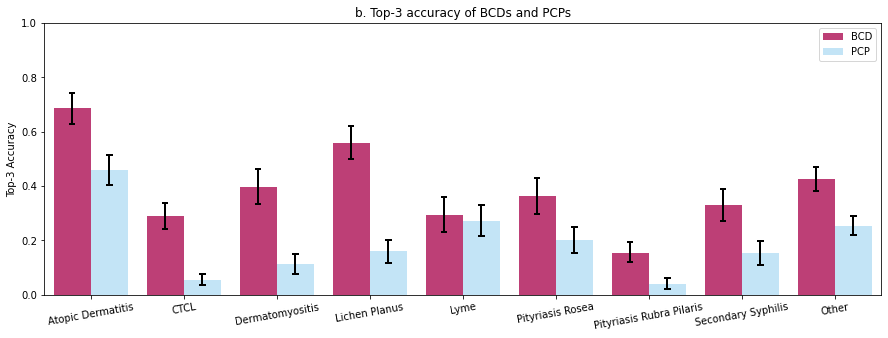

In [5]:
def plotterxxx(data,name, hue):
    data.loc[data.dermatologist==1, "physician_type"] = "BCD"
    data.loc[data.pcp_physician==1, "physician_type"] = "PCP"

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colors = [p1d,p2d]
    custom = sns.set_palette(sns.color_palette(colors))
    ax = sns.barplot(x="consensus_label_simplified", y="correct_diagnosis",hue=hue,
                     data=data, 
                     alpha=.99,
                     errcolor="black", errwidth=2, capsize=.05,
                     order=[ 'Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis',"Additional",],
                     palette=custom)
    ax.set_ylabel("Top-3 Accuracy")
    ax.set_xlabel("")
    ax.set_xticklabels(['Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis',"Other"], rotation = 10)
    ax.legend(loc="upper right")
    ax.set_ylim(0,1)
    ax.set_title("{}".format("b. Top-3 accuracy of BCDs and PCPs"))
    fig.set_size_inches(15, 5)
    fig.savefig("figs/f1_{}.png".format(name),dpi=600, bbox_inches="tight")



plotterxxx(df_r1[(df_r1.dermatologist==1) | (df_r1.pcp_physician==1)],"b","physician_type")

In [6]:
for i in df_r1.consensus_label_simplified.unique():
    print(i)
    print(stats.ttest_ind(
    df_r1[(df_r1.dermatologist==1) & (df.consensus_label_simplified==i)].correct_diagnosis,
    df_r1[(df_r1.pcp_physician==1) & (df.consensus_label_simplified==i)].correct_diagnosis))

CTCL
Ttest_indResult(statistic=9.065050342203266, pvalue=1.114544442408074e-18)
Pityriasis Rubra Pilaris
Ttest_indResult(statistic=5.495764836226675, pvalue=5.29980386523932e-08)
Lyme
Ttest_indResult(statistic=0.5281158505623739, pvalue=0.5976894733827831)
Dermatomyositis
Ttest_indResult(statistic=7.907686123112235, pvalue=1.6410712139630732e-14)
Additional
Ttest_indResult(statistic=6.495330657846884, pvalue=1.1992433790663865e-10)
Atopic Dermatitis
Ttest_indResult(statistic=5.49134129724003, pvalue=6.088712546558865e-08)
Pityriasis Rosea
Ttest_indResult(statistic=4.205804418899486, pvalue=3.067454203565622e-05)
Lichen Planus
Ttest_indResult(statistic=11.026878071833577, pvalue=9.141394770742345e-26)
Secondary Syphilis
Ttest_indResult(statistic=4.596140542290627, pvalue=5.5179361282217065e-06)


## Figure 3

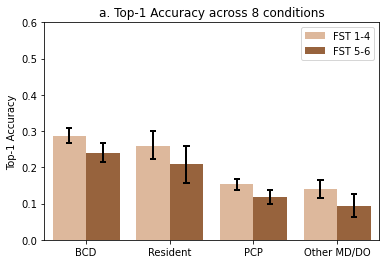

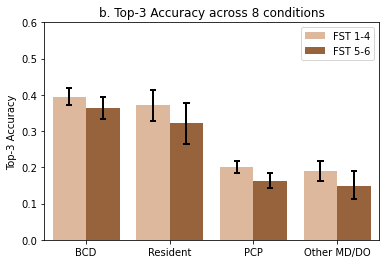

In [7]:

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data=df_r1 
colors = [palette2,palette5,]
data.fitzpatrick=data.fitzpatrick.astype(int)
custom = sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="physician_type", y="diff1",
                 hue="dark2",
                     hue_order=["FST 1-4","FST 5-6"],
                 data=data, 
                 alpha=.99,
                 errcolor="black", errwidth=2, capsize=.05,
                 palette=custom,
#                  order=["FST 1-4","FST 5-6"]
                )
ax.set_ylabel("Top-1 Accuracy")
ax.set_xlabel("")
ax.set_title("{}".format("a. Top-1 Accuracy across 8 conditions"))
ax.set_xticklabels(["BCD","Resident","PCP","Other MD/DO"])

ax.legend(loc="upper right")
ax.set_ylim(0,.6)
fig.savefig("figs/f2_a.png",dpi=600, bbox_inches="tight")



fig = plt.figure()
ax = fig.add_subplot(1,1,1)
data=df_r1  
colors = [palette2,palette5,]
data.fitzpatrick=data.fitzpatrick.astype(int)
custom = sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="physician_type", y="correct_diagnosis",
                 hue="dark2",
                     hue_order=["FST 1-4","FST 5-6"],
                 data=data, 
                 alpha=.99,
                 errcolor="black", errwidth=2, capsize=.05,
                 palette=custom,
#                  order=["FST 1-4","FST 5-6"]
                )
ax.set_ylabel("Top-3 Accuracy")
ax.set_xlabel("")
ax.set_title("{}".format("b. Top-3 Accuracy across 8 conditions"))
ax.set_xticklabels(["BCD","Resident","PCP","Other MD/DO"])

ax.legend(loc="upper right")
ax.set_ylim(0,.6)
fig.savefig("figs/f2_b.png",dpi=600, bbox_inches="tight")

In [8]:
for i in ["Board-certified/board-eligible dermatologist (MD or DO)","Dermatology resident (MD or DO)",
         "PCP physician (MD or DO)","Other physician (MD or DO)"]:
    print(i)
    print(stats.ttest_ind(
    df_r1[(df_r1.physician_type==i) & (df.dark2=="FST 1-4")].diff1,
    df_r1[(df_r1.physician_type==i) & (df.dark2=="FST 5-6")].diff1)[1])

for i in ["Board-certified/board-eligible dermatologist (MD or DO)","Dermatology resident (MD or DO)",
         "PCP physician (MD or DO)","Other physician (MD or DO)"]:
    print(i)
    print(stats.ttest_ind(
    df_r1[(df_r1.physician_type==i) & (df.dark2=="FST 1-4")].correct_diagnosis,
    df_r1[(df_r1.physician_type==i) & (df.dark2=="FST 5-6")].correct_diagnosis)[1])

Board-certified/board-eligible dermatologist (MD or DO)
0.008583571488073767
Dermatology resident (MD or DO)
0.1358800704663719
PCP physician (MD or DO)
0.008635980458561981
Other physician (MD or DO)
0.031184747758917823
Board-certified/board-eligible dermatologist (MD or DO)
0.1109562232572843
Dermatology resident (MD or DO)
0.16458401771438622
PCP physician (MD or DO)
0.009068977532199986
Other physician (MD or DO)
0.12022824317897565


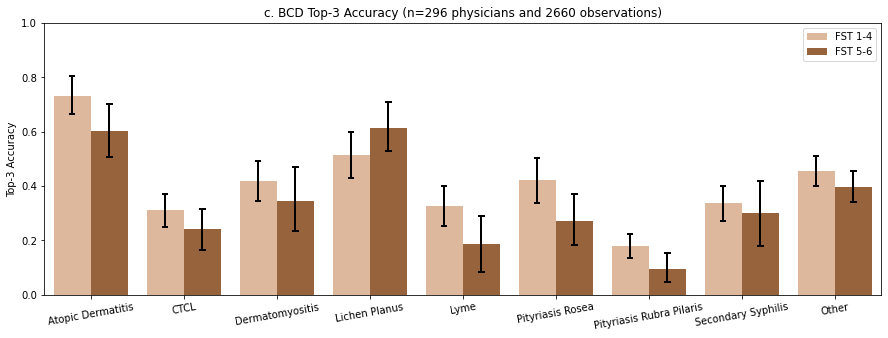

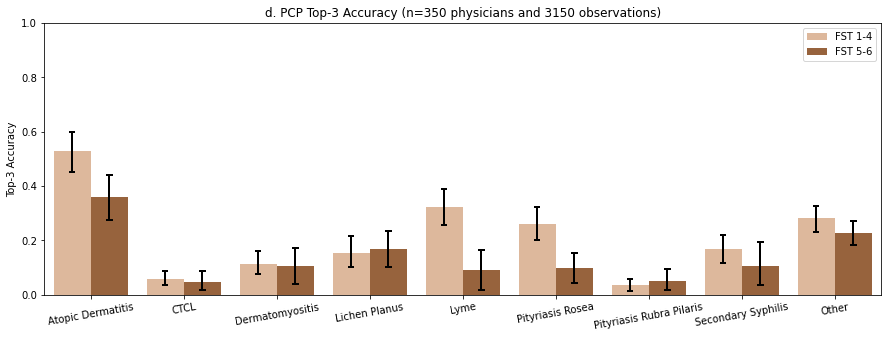

In [9]:

def plotter(data,name,title, hue):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    if hue=="fitzpatrick":
        colors = [palette1, palette2, palette3, palette4, palette5, palette6]
    elif hue=="dark2":
        colors = [palette2,palette5]
    custom = sns.set_palette(sns.color_palette(colors))
    ax = sns.barplot(x="consensus_label_simplified", y="correct_diagnosis",hue=hue,
                     hue_order=["FST 1-4","FST 5-6"],
                     data=data, 
                     alpha=.99,
                     errcolor="black", errwidth=2, capsize=.05,
                     order=['Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis',"Additional"],
                     palette=custom)
    ax.set_ylabel("Top-3 Accuracy")
    ax.set_xlabel("")
    ax.set_title("{}".format(title))
    ax.set_xticklabels([ 'Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis',"Other",], rotation = 10)
    ax.legend(loc="upper right")
    ax.set_ylim(0,1)
    fig.set_size_inches(15, 5)
    fig.savefig("figs/f2_{}.png".format(name,hue),dpi=600, bbox_inches="tight")



plotter(bcd,"c", 
        "c. BCD Top-3 Accuracy (n={} physicians and {} observations)".format(
            bcd.user_id.nunique(),bcd.shape[0])
        , "dark2")

plotter(pcp,"d", "d. PCP Top-3 Accuracy (n={} physicians and {} observations)".format(
    pcp.user_id.nunique(),pcp.shape[0]), "dark2")


In [10]:
for i in ["Board-certified/board-eligible dermatologist (MD or DO)","Dermatology resident (MD or DO)",
         "PCP physician (MD or DO)","Other physician (MD or DO)"]:
    for j in [ 'Atopic Dermatitis','CTCL',  'Dermatomyositis','Lichen Planus', 'Lyme',
        'Pityriasis Rosea','Pityriasis Rubra Pilaris',
        'Secondary Syphilis','Additional',]:
        print(i,j)
        print(stats.ttest_ind(
        df_r1[(df_r1.physician_type==i) & (df_r1.consensus_label_simplified==j) & (df.dark2=="FST 1-4")].correct_diagnosis,
        df_r1[(df_r1.physician_type==i) & (df_r1.consensus_label_simplified==j) & (df.dark2=="FST 5-6")].correct_diagnosis)[1])

Board-certified/board-eligible dermatologist (MD or DO) Atopic Dermatitis
0.035921020575504815
Board-certified/board-eligible dermatologist (MD or DO) CTCL
0.18384898468076136
Board-certified/board-eligible dermatologist (MD or DO) Dermatomyositis
0.3109942974194042
Board-certified/board-eligible dermatologist (MD or DO) Lichen Planus
0.10123223271876132
Board-certified/board-eligible dermatologist (MD or DO) Lyme
0.06573182609460333
Board-certified/board-eligible dermatologist (MD or DO) Pityriasis Rosea
0.027605714836095047
Board-certified/board-eligible dermatologist (MD or DO) Pityriasis Rubra Pilaris
0.04941119915044679
Board-certified/board-eligible dermatologist (MD or DO) Secondary Syphilis
0.6066982467356141
Board-certified/board-eligible dermatologist (MD or DO) Additional
0.147708894105951
Dermatology resident (MD or DO) Atopic Dermatitis
0.1715631761650245
Dermatology resident (MD or DO) CTCL
0.5516595022995454
Dermatology resident (MD or DO) Dermatomyositis
0.3470657590193

## Figure 4

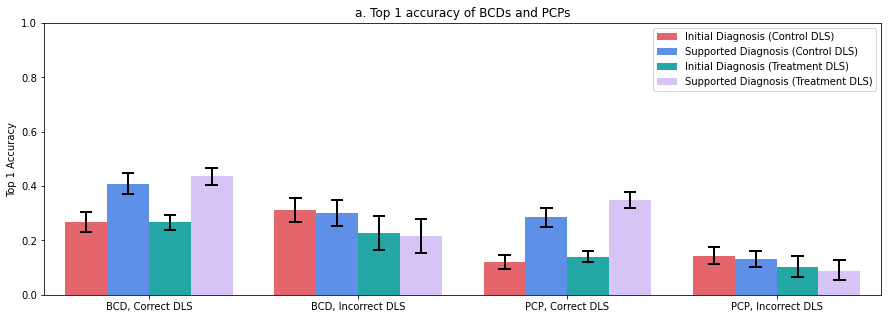

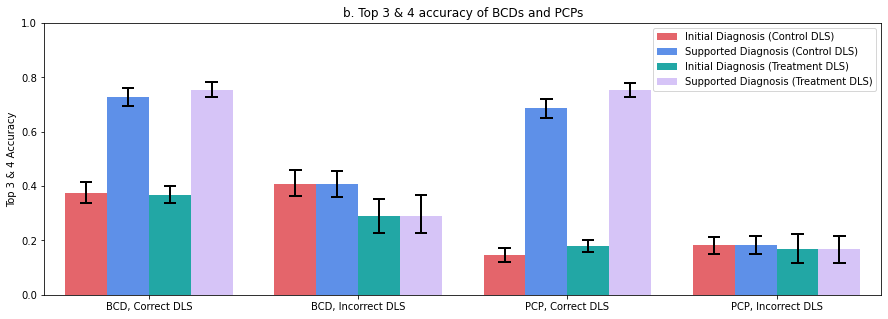

In [11]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = [p1c, p2c,p3c,p4c]
data1 = df_r2[(df_r2.consensus_label_simplified!="Additional") 
              &((df_r2.pcp_physician==1) | (df_r2.dermatologist==1))][[
    "physician_type","prediction_correct","correctly_update_leading_or_correct","correct_diagnosis",
        "diff1","diff2","diff3","x_enhanced_model"]]
data1["prediction_correct"] = data1["prediction_correct"].astype(int)

data2 = data1.copy()
data2["guess_round"]=2
data1["guess_round"]=1
data = data1.append(data2).reset_index()
data["outcome_type"] = "xxx"
data.loc[(data.prediction_correct==1) & (data.guess_round==1),"outcome_type"] ="Correct Prediction, Initial Diagnosis"
data.loc[(data.prediction_correct==1) & (data.guess_round==2),"outcome_type"] = "Correct Prediction, Assisted Diagnosis"
data.loc[(data.prediction_correct==0) & (data.guess_round==1),"outcome_type"] = "Incorrect Prediction, Initial Diagnosis"
data.loc[(data.prediction_correct==0) & (data.guess_round==2),"outcome_type"] = "Incorrect Prediction, Assisted Diagnosis"


data["guess_round_label"] = ""
data.loc[(data.guess_round==1) &  (data.x_enhanced_model==0),"guess_round_label"] ="Initial Diagnosis (Control DLS)"
data.loc[(data.guess_round==1) &  (data.x_enhanced_model==1),"guess_round_label"] ="Initial Diagnosis (Treatment DLS)"
data.loc[(data.guess_round==2) & (data.x_enhanced_model==0),"guess_round_label"] ="Supported Diagnosis (Control DLS)"
data.loc[(data.guess_round==2) & (data.x_enhanced_model==1),"guess_round_label"] ="Supported Diagnosis (Treatment DLS)"

data["outcome"] = data.diff1
data.loc[(data.prediction_correct==1) & (data.guess_round==1),"outcome"] = data.diff1
data.loc[(data.prediction_correct==1) & (data.guess_round==2),"outcome"] = data.correctly_update_leading_or_correct
data.loc[(data.prediction_correct==0) & (data.guess_round==1),"outcome"] = data.diff1
data.loc[(data.prediction_correct==0) & (data.guess_round==2),"outcome"] = data.correctly_update_leading_or_correct

data.loc[((data.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") 
     & (data.prediction_correct==1)),"physician_type"] = "BCD, Correct DLS"

data.loc[(data.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") 
     & (data.prediction_correct==0),"physician_type"] = "BCD, Incorrect DLS"

data.loc[(data.physician_type=="PCP physician (MD or DO)") 
     & (data.prediction_correct==1),"physician_type"] = "PCP, Correct DLS"

data.loc[(data.physician_type=="PCP physician (MD or DO)") 
     & (data.prediction_correct==0),"physician_type"] = "PCP, Incorrect DLS"


t1_accuracy_by_correct = data.copy()

# print(data.outcome_type.value_counts())
# print(data.outcome.value_counts())
custom = sns.set_palette(sns.color_palette(colors))
# print(data.groupby(["physician_type","guess_round_label"]).outcome.mean())
ax = sns.barplot(x="physician_type", y="outcome",hue="guess_round_label",
                                      hue_order=["Initial Diagnosis (Control DLS)",
                                                
                                                 "Supported Diagnosis (Control DLS)",
                                                  "Initial Diagnosis (Treatment DLS)",
                                                 "Supported Diagnosis (Treatment DLS)"],
                                                 

                 data=data, 
                 alpha=.99,
                 errcolor="black", errwidth=2, capsize=.05,
                 order=["BCD, Correct DLS",
                       "BCD, Incorrect DLS","PCP, Correct DLS","PCP, Incorrect DLS"
                       ],
                 palette=colors)
ax.set_ylabel("Top 1 Accuracy")
ax.set_xlabel("")
# ax.set_xticklabels(["BCD, Corre","PCP"])
ax.legend(loc="upper right")
ax.set_ylim(0,1)
ax.set_title("{}".format("a. Top 1 accuracy of BCDs and PCPs"))
fig.set_size_inches(15, 5)
fig.savefig("figs/f3_a.png",dpi=600, bbox_inches="tight")

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = [p1c,p2c,p3c,p4c]
data1 = df_r2[(df_r2.consensus_label_simplified!="Additional") 
#               & (df_r2.x_enhanced_model==0) 
              &((df_r2.pcp_physician==1) | (df_r2.dermatologist==1))][[
    "physician_type","prediction_correct","correctly_update_leading_or_correct","correct_diagnosis",
        "diff1","diff2","diff3","x_enhanced_model"]]
data1["prediction_correct"] = data1["prediction_correct"].astype(int)

data2 = data1.copy()
data2["guess_round"]=2
data1["guess_round"]=1
data = data1.append(data2).reset_index()
data["outcome_type"] = "xxx"
data.loc[(data.prediction_correct==1) & (data.guess_round==1),"outcome_type"] ="Correct Prediction, Initial Diagnosis"
data.loc[(data.prediction_correct==1) & (data.guess_round==2),"outcome_type"] = "Correct Prediction, Assisted Diagnosis"
data.loc[(data.prediction_correct==0) & (data.guess_round==1),"outcome_type"] = "Incorrect Prediction, Initial Diagnosis"
data.loc[(data.prediction_correct==0) & (data.guess_round==2),"outcome_type"] = "Incorrect Prediction, Assisted Diagnosis"


data["guess_round_label"] = ""
data.loc[(data.guess_round==1) &  (data.x_enhanced_model==0),"guess_round_label"] ="Initial Diagnosis (Control DLS)"
data.loc[(data.guess_round==1) &  (data.x_enhanced_model==1),"guess_round_label"] ="Initial Diagnosis (Treatment DLS)"
data.loc[(data.guess_round==2) & (data.x_enhanced_model==0),"guess_round_label"] ="Supported Diagnosis (Control DLS)"
data.loc[(data.guess_round==2) & (data.x_enhanced_model==1),"guess_round_label"] ="Supported Diagnosis (Treatment DLS)"

data["outcome"] = data.diff1
data.loc[(data.prediction_correct==1) & (data.guess_round==1),"outcome"] = (data.diff1==1)|(data.diff2==1)|(data.diff3==1)
data.loc[(data.prediction_correct==1) & (data.guess_round==2),"outcome"] = data.correct_diagnosis
data.loc[(data.prediction_correct==0) & (data.guess_round==1),"outcome"] = (data.diff1==1)|(data.diff2==1)|(data.diff3==1)
data.loc[(data.prediction_correct==0) & (data.guess_round==2),"outcome"] = data.correct_diagnosis

data.loc[((data.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") 
     & (data.prediction_correct==1)),"physician_type"] = "BCD, Correct DLS"

data.loc[(data.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") 
     & (data.prediction_correct==0),"physician_type"] = "BCD, Incorrect DLS"

data.loc[(data.physician_type=="PCP physician (MD or DO)") 
     & (data.prediction_correct==1),"physician_type"] = "PCP, Correct DLS"

data.loc[(data.physician_type=="PCP physician (MD or DO)") 
     & (data.prediction_correct==0),"physician_type"] = "PCP, Incorrect DLS"

custom = sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="physician_type", y="outcome",hue="guess_round_label",
                 hue_order=["Initial Diagnosis (Control DLS)",
                                                
                                                 "Supported Diagnosis (Control DLS)",
                                                  "Initial Diagnosis (Treatment DLS)",
                                                 "Supported Diagnosis (Treatment DLS)"],
                 data=data, 
                 alpha=.99,
                 errcolor="black", errwidth=2, capsize=.05,
                 order=["BCD, Correct DLS",
                       "BCD, Incorrect DLS","PCP, Correct DLS","PCP, Incorrect DLS"
                       ],
                 palette=colors)
ax.set_ylabel("Top 3 & 4 Accuracy")
ax.set_xlabel("")
# ax.set_xticklabels(["BCD","PCP"])
ax.legend(loc="upper right")
ax.set_ylim(0,1)
ax.set_title("{}".format("b. Top 3 & 4 accuracy of BCDs and PCPs"))
fig.set_size_inches(15, 5)
fig.savefig("figs/f3_b.png",dpi=600, bbox_inches="tight")

## Figure 5

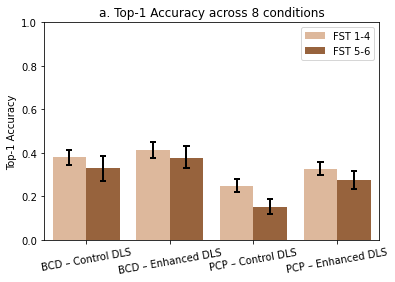

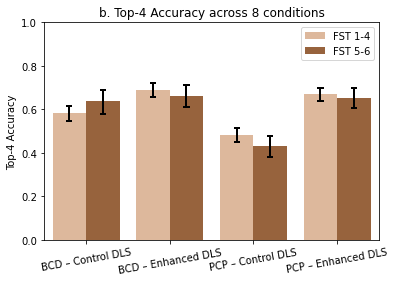

In [12]:

data=df_r2[(df_r2.consensus_label_simplified!="Additional") & ((df_r2.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") | (df_r2.physician_type=="PCP physician (MD or DO)"))]

data.loc[(data.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (data.x_enhanced_model==0), "physician_type"] ="BCD – Control DLS"
data.loc[(data.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (data.x_enhanced_model==1), "physician_type"] ="BCD – Enhanced DLS"
data.loc[(data.physician_type=="PCP physician (MD or DO)") & (data.x_enhanced_model==0), "physician_type"] ="PCP – Control DLS"
data.loc[(data.physician_type=="PCP physician (MD or DO)") & (data.x_enhanced_model==1), "physician_type"] ="PCP – Enhanced DLS"

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = [palette2,palette5,]
data.fitzpatrick=data.fitzpatrick.astype(int)
custom = sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="physician_type", y="correctly_update_leading_or_correct",
                 hue="dark2",
                     hue_order=["FST 1-4","FST 5-6"],
                 data=data, 
                 alpha=.99,
                 errcolor="black", errwidth=2, capsize=.05,
                 palette=custom,
                 order=["BCD – Control DLS", "BCD – Enhanced DLS","PCP – Control DLS", "PCP – Enhanced DLS",]
                )
ax.set_ylabel("Top-1 Accuracy")
ax.set_xlabel("")
ax.set_title("{}".format("a. Top-1 Accuracy across 8 conditions"))
ax.set_xticklabels(["BCD – Control DLS", "BCD – Enhanced DLS","PCP – Control DLS", "PCP – Enhanced DLS",], rotation=10)

ax.legend(loc="upper right")
ax.set_ylim(0,1)
fig.savefig("figs/pmp_top_1diff.png",dpi=600, bbox_inches="tight")


fig = plt.figure()
ax = fig.add_subplot(1,1,1)
colors = [palette2,palette5,]
data.fitzpatrick=data.fitzpatrick.astype(int)
custom = sns.set_palette(sns.color_palette(colors))
ax = sns.barplot(x="physician_type", y="correct_diagnosis",
                 hue="dark2",
                     hue_order=["FST 1-4","FST 5-6"],
                 data=data, 
                 alpha=.99,
                 errcolor="black", errwidth=2, capsize=.05,
                 palette=custom,
                 order=["BCD – Control DLS", "BCD – Enhanced DLS","PCP – Control DLS", "PCP – Enhanced DLS",]
                )
ax.set_ylabel("Top-4 Accuracy")
ax.set_xlabel("")
ax.set_title("{}".format("b. Top-4 Accuracy across 8 conditions"))
ax.set_xticklabels(["BCD – Control DLS", "BCD – Enhanced DLS","PCP – Control DLS", "PCP – Enhanced DLS",], rotation=10)

ax.legend(loc="upper right")
ax.set_ylim(0,1)
fig.savefig("figs/pmp_top_4diff.png",dpi=600, bbox_inches="tight")


In [13]:
for i in ["Board-certified/board-eligible dermatologist (MD or DO)",
         "PCP physician (MD or DO)"]:
    for j in [0,1]:
        print(i,j)
        print(stats.ttest_ind(
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 1-4") & (df_r2.x_enhanced_model==j)].correctly_update_leading_or_correct,
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 5-6") & (df_r2.x_enhanced_model==j)].correctly_update_leading_or_correct)[1])
        
        
print("xx")

for i in ["Board-certified/board-eligible dermatologist (MD or DO)",
         "PCP physician (MD or DO)"]:
    for j in [0,1]:
        print(i,j)
        print(stats.ttest_ind(
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 1-4") & (df_r2.x_enhanced_model==j)].correct_diagnosis,
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 5-6") & (df_r2.x_enhanced_model==j)].correct_diagnosis)[1])

Board-certified/board-eligible dermatologist (MD or DO) 0
0.1279017891458986
Board-certified/board-eligible dermatologist (MD or DO) 1
0.2615175975185639
PCP physician (MD or DO) 0
0.00014724442806347
PCP physician (MD or DO) 1
0.05679038505910179
xx
Board-certified/board-eligible dermatologist (MD or DO) 0
0.09607396787489748
Board-certified/board-eligible dermatologist (MD or DO) 1
0.2992023501357136
PCP physician (MD or DO) 0
0.08316020117231594
PCP physician (MD or DO) 1
0.5409678021717893


In [14]:
for i in ["Board-certified/board-eligible dermatologist (MD or DO)",
         "PCP physician (MD or DO)"]:
        print(i,j)
        print(stats.ttest_ind(
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 1-4")].correctly_update_leading_or_correct,
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 5-6")].correctly_update_leading_or_correct)[1])
        
        
print("xx")

for i in ["Board-certified/board-eligible dermatologist (MD or DO)",
         "PCP physician (MD or DO)"]:
        print(i,j)
        print(stats.ttest_ind(
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 1-4")].correct_diagnosis,
        df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.physician_type==i) & (df_r2.dark2=="FST 5-6")].correct_diagnosis)[1])

Board-certified/board-eligible dermatologist (MD or DO) 1
0.07092829641154783
PCP physician (MD or DO) 1
8.117898251040539e-05
xx
Board-certified/board-eligible dermatologist (MD or DO) 1
0.5913488910763444
PCP physician (MD or DO) 1
0.08395119043976176


# Results

## Physician Characteristics

In [15]:
print(df[df.guess_round==1].shape[0], df.user_id.nunique(), df.image_id.nunique())
print("\n")
print(df.groupby("physician_type").user_id.nunique())
print(df[(df.guess_round==1) 
        ].groupby("physician_type").image_id.count())
print("\n")
print(df[df.attention_check==1].groupby("physician_type").user_id.nunique()/df.groupby("physician_type").user_id.nunique())
print("\n")
print(df[(df.guess_round==1) & (df.total_seen>=10) & (df.attention_check==1)].groupby("physician_type").user_id.nunique()/df.groupby("physician_type").user_id.nunique())
print("\n")
print(df[(df.guess_round==1) 
         & (df.total_seen>=10)
         & (df.seen<=10) & (df.seen>1) 
         & (df.attention_check==1) & (df.differential_1!="test")
        ].groupby("physician_type").image_id.count())

print(df[(df.guess_round==1) 
         & (df.total_seen>=10)
         & (df.seen<=10) & (df.seen>1) 
         & (df.attention_check==1) & (df.differential_1!="test")
        ].groupby("physician_type").user_id.nunique())


14261 1118 364


physician_type
Board-certified/board-eligible dermatologist (MD or DO)    389
Dermatology resident (MD or DO)                            116
Other physician (MD or DO)                                 154
PCP physician (MD or DO)                                   459
Name: user_id, dtype: int64
physician_type
Board-certified/board-eligible dermatologist (MD or DO)    5365
Dermatology resident (MD or DO)                            1691
Other physician (MD or DO)                                 1747
PCP physician (MD or DO)                                   5458
Name: image_id, dtype: int64


physician_type
Board-certified/board-eligible dermatologist (MD or DO)    0.982005
Dermatology resident (MD or DO)                            0.956897
Other physician (MD or DO)                                 0.980519
PCP physician (MD or DO)                                   0.980392
Name: user_id, dtype: float64


physician_type
Board-certified/board-eligible dermatologist (MD or 

## Overall Diagnostic Accuracy

### First Paragraph

In [16]:
print(df_r1[df_r1.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].correct_diagnosis.mean())
print(df_r1[df_r1.physician_type=="Dermatology resident (MD or DO)"].correct_diagnosis.mean())
print(df_r1[df_r1.physician_type=="PCP physician (MD or DO)"].correct_diagnosis.mean())
print(df_r1[df_r1.physician_type=="Other physician (MD or DO)"].correct_diagnosis.mean())

0.3838345864661654
0.35609103078982596
0.18698412698412697
0.17635467980295566


In [17]:
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].correct_diagnosis.mean())
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="Dermatology resident (MD or DO)")].correct_diagnosis.mean())
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="PCP physician (MD or DO)")].correct_diagnosis.mean())
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="Other physician (MD or DO)")].correct_diagnosis.mean())

0.3721153846153846
0.3474576271186441
0.16947115384615385
0.16034271725826194


In [18]:
print(df_r1[df_r1.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].diff1.mean())
print(df_r1[df_r1.physician_type=="Dermatology resident (MD or DO)"].diff1.mean())
print(df_r1[df_r1.physician_type=="PCP physician (MD or DO)"].diff1.mean())
print(df_r1[df_r1.physician_type=="Other physician (MD or DO)"].diff1.mean())

0.27030075187969926
0.24364123159303883
0.14095238095238094
0.12610837438423644


In [19]:
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].diff1.mean())
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="Dermatology resident (MD or DO)")].diff1.mean())
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="PCP physician (MD or DO)")].diff1.mean())
print(df_r1[(df_r1.consensus_label_simplified!="Additional") & (df_r1.physician_type=="Other physician (MD or DO)")].diff1.mean())

0.27307692307692305
0.2423728813559322
0.13221153846153846
0.12239902080783353


In [20]:
def crowdw_t1(bcd):
    x1 = bcd.groupby(["image_id","consensus_label"])["correct_diagnosis", "diff1",'lyme',
           'secondary_syphilis', 'ctcl', 'pityriasis_rubra_pilaris',
           'pityriasis_rosea', 'dermatomyositis', 'lichen_planus',
           'atopic_dermatitis',
                                                     "stasis edema",
"seborrheic dermatitis",
"rhinophyma",
"neurotic excoriations",
"erythema nodosum",
"cheilitis",
"livedo reticularis",
"fixed eruptions",
"lichen simplex",
"vitiligo",
"tungiasis",
"necrobiosis lipoidica",
"nematode infection",
"psoriasis",
"keratosis pilaris",
"factitial dermatitis",
"stevens johnson syndrome",
"lichen amyloidosis",
"granuloma annulare",
"sarcoidosis",
"erythema elevatum diutinum",
"xanthomas",
"allergic contact dermatitis",
"rosacea",
"urticaria pigmentosa",
"calcinosis cutis",
"hidradenitis",
"keloid",
"tick bite",
"urticaria",
"acanthosis nigricans",
"scabies",
"scleroderma",
"papilomatosis confluentes and reticulate",
"lupus erythematosus","acne"
                                                    ].agg(["sum"]).reset_index()
    x1.columns = ["image_id","consensus_label", "correct_diagnosis","diff1",'lyme',
           'secondary_syphilis', 'cutaneous_t-cell_lymphoma', 'pityriasis_rubra_pilaris',
           'pityriasis rosea', 'dermatomyositis', 'lichen_planus',
           'atopic_dermatitis',
                          "stasis edema",
        "seborrheic dermatitis",
        "rhinophyma",
        "neurotic excoriations",
        "erythema nodosum",
        "cheilitis",
        "livedo reticularis",
        "fixed eruptions",
        "lichen simplex",
        "vitiligo",
        "tungiasis",
        "necrobiosis lipoidica",
        "nematode infection",
        "psoriasis",
        "keratosis pilaris",
        "factitial dermatitis",
        "stevens johnson syndrome",
        "lichen amyloidosis",
        "granuloma annulare",
        "sarcoidosis",
        "erythema elevatum diutinum",
        "xanthomas",
        "allergic contact dermatitis",
        "rosacea",
        "urticaria pigmentosa",
        "calcinosis cutis",
        "hidradenitis",
        "keloid",
        "tick bite",
        "urticaria",
        "acanthosis nigricans",
        "scabies",
        "scleroderma",
        "papilomatosis confluentes and reticulate",
        "lupus erythematosus","acne"
                 ]
    x2 = bcd.groupby(["image_id"])['user_id'].agg(["count"]).reset_index()
    x2.columns = ["image_id","total"]
    x3 = pd.merge(x1,x2,on="image_id").sort_values("total",ascending=False).reset_index()
    del x3["index"]
    x3["cw"] = x3[[ 'lyme',
           'secondary_syphilis', 'cutaneous_t-cell_lymphoma', 'pityriasis_rubra_pilaris',
           'pityriasis rosea', 'dermatomyositis', 'lichen_planus',
           'atopic_dermatitis',"stasis edema",
        "seborrheic dermatitis",
        "rhinophyma",
        "neurotic excoriations",
        "erythema nodosum",
        "cheilitis",
        "livedo reticularis",
        "fixed eruptions",
        "lichen simplex",
        "vitiligo",
        "tungiasis",
        "necrobiosis lipoidica",
        "nematode infection",
        "psoriasis",
        "keratosis pilaris",
        "factitial dermatitis",
        "stevens johnson syndrome",
        "lichen amyloidosis",
        "granuloma annulare",
        "sarcoidosis",
        "erythema elevatum diutinum",
        "xanthomas",
        "allergic contact dermatitis",
        "rosacea",
        "urticaria pigmentosa",
        "calcinosis cutis",
        "hidradenitis",
        "keloid",
        "tick bite",
        "urticaria",
        "acanthosis nigricans",
        "scabies",
        "scleroderma",
        "papilomatosis confluentes and reticulate",
        "lupus erythematosus","acne"
                  ]].idxmax(axis=1)
    
    x3["cw_count"] = x3[[ 'lyme',
           'secondary_syphilis', 'cutaneous_t-cell_lymphoma', 'pityriasis_rubra_pilaris',
           'pityriasis rosea', 'dermatomyositis', 'lichen_planus',
           'atopic_dermatitis',"stasis edema",
        "seborrheic dermatitis",
        "rhinophyma",
        "neurotic excoriations",
        "erythema nodosum",
        "cheilitis",
        "livedo reticularis",
        "fixed eruptions",
        "lichen simplex",
        "vitiligo",
        "tungiasis",
        "necrobiosis lipoidica",
        "nematode infection",
        "psoriasis",
        "keratosis pilaris",
        "factitial dermatitis",
        "stevens johnson syndrome",
        "lichen amyloidosis",
        "granuloma annulare",
        "sarcoidosis",
        "erythema elevatum diutinum",
        "xanthomas",
        "allergic contact dermatitis",
        "rosacea",
        "urticaria pigmentosa",
        "calcinosis cutis",
        "hidradenitis",
        "keloid",
        "tick bite",
        "urticaria",
        "acanthosis nigricans",
        "scabies",
        "scleroderma",
        "papilomatosis confluentes and reticulate",
        "lupus erythematosus","acne"
                  ]].max(axis=1)
        
    x3["crowd_correct"] = x3["consensus_label"].astype(str) == x3["cw"].astype(str)
    x3["crowd_accuracy"] = x3.diff1/x3.total
    x3["combo"] = x3.consensus_label.astype(str) + " + " + x3.cw.astype(str)
    print(x3.crowd_correct.mean())
    print(x3[x3.total>2].crowd_correct.mean())
#     print(x3[(x3.total>2) & (x3.crowd_accuracy==0)].shape[0],x3[(x3.total>2)].shape[0]
#           ,
#           x3[(x3.crowd_accuracy==0)].shape[0]/x3.shape[0])
#     print("\n")
    x3 = x3[['image_id', 'consensus_label', 'correct_diagnosis', 'diff1', 
             
             'total', 'cw', "cw_count",'crowd_correct', 'crowd_accuracy', 'combo',
             'lyme',
       'secondary_syphilis', 'cutaneous_t-cell_lymphoma',
       'pityriasis_rubra_pilaris', 'pityriasis rosea', 'dermatomyositis',
       'lichen_planus', 'atopic_dermatitis', 'stasis edema',
       'seborrheic dermatitis', 'rhinophyma', 'neurotic excoriations',
       'erythema nodosum', 'cheilitis', 'livedo reticularis',
       'fixed eruptions', 'lichen simplex', 'vitiligo', 'tungiasis',
       'necrobiosis lipoidica', 'nematode infection', 'psoriasis',
       'keratosis pilaris', 'factitial dermatitis', 'stevens johnson syndrome',
       'lichen amyloidosis', 'granuloma annulare', 'sarcoidosis',
       'erythema elevatum diutinum', 'xanthomas',
       'allergic contact dermatitis', 'rosacea', 'urticaria pigmentosa',
       'calcinosis cutis', 'hidradenitis', 'keloid', 'tick bite', 'urticaria',
       'acanthosis nigricans', 'scabies', 'scleroderma',
       'papilomatosis confluentes and reticulate', 'lupus erythematosus',"acne"
       ]].reset_index()
    return x3

def crowdw_t3(bcd):
    x1 = bcd.groupby(["image_id","consensus_label"])["correct_diagnosis", "diff1",'any_lyme',
           'any_secondary_syphilis', 'any_ctcl', 'any_pityriasis_rubra_pilaris',
           'any_pityriasis_rosea', 'any_dermatomyositis', 'any_lichen_planus',
           'any_atopic_dermatitis',
                                                     "any_stasis edema",
"any_seborrheic dermatitis",
"any_rhinophyma",
"any_neurotic excoriations",
"any_erythema nodosum",
"any_cheilitis",
"any_livedo reticularis",
"any_fixed eruptions",
"any_lichen simplex",
"any_vitiligo",
"any_tungiasis",
"any_necrobiosis lipoidica",
"any_nematode infection",
"any_psoriasis",
"any_keratosis pilaris",
"any_factitial dermatitis",
"any_stevens johnson syndrome",
"any_lichen amyloidosis",
"any_granuloma annulare",
"any_sarcoidosis",
"any_erythema elevatum diutinum",
"any_xanthomas",
"any_allergic contact dermatitis",
"any_rosacea",
"any_urticaria pigmentosa",
"any_calcinosis cutis",
"any_hidradenitis",
"any_keloid",
"any_tick bite",
"any_urticaria",
"any_acanthosis nigricans",
"any_scabies",
"any_scleroderma",
"any_papilomatosis confluentes and reticulate",
"any_lupus erythematosus","any_acne"
                                                    ].agg(["sum"]).reset_index()
    x1.columns = ["image_id","consensus_label", "correct_diagnosis","diff1",'lyme',
           'secondary_syphilis', 'cutaneous_t-cell_lymphoma', 'pityriasis_rubra_pilaris',
           'pityriasis rosea', 'dermatomyositis', 'lichen_planus',
           'atopic_dermatitis',
                          "stasis edema",
        "seborrheic dermatitis",
        "rhinophyma",
        "neurotic excoriations",
        "erythema nodosum",
        "cheilitis",
        "livedo reticularis",
        "fixed eruptions",
        "lichen simplex",
        "vitiligo",
        "tungiasis",
        "necrobiosis lipoidica",
        "nematode infection",
        "psoriasis",
        "keratosis pilaris",
        "factitial dermatitis",
        "stevens johnson syndrome",
        "lichen amyloidosis",
        "granuloma annulare",
        "sarcoidosis",
        "erythema elevatum diutinum",
        "xanthomas",
        "allergic contact dermatitis",
        "rosacea",
        "urticaria pigmentosa",
        "calcinosis cutis",
        "hidradenitis",
        "keloid",
        "tick bite",
        "urticaria",
        "acanthosis nigricans",
        "scabies",
        "scleroderma",
        "papilomatosis confluentes and reticulate",
        "lupus erythematosus","acne"
                 ]
    x2 = bcd.groupby(["image_id"])['user_id'].agg(["count"]).reset_index()
    x2.columns = ["image_id","total"]
    x3 = pd.merge(x1,x2,on="image_id").sort_values("total",ascending=False).reset_index()
    del x3["index"]
    x3["cw"] = x3[[ 'lyme',
           'secondary_syphilis', 'cutaneous_t-cell_lymphoma', 'pityriasis_rubra_pilaris',
           'pityriasis rosea', 'dermatomyositis', 'lichen_planus',
           'atopic_dermatitis',"stasis edema",
        "seborrheic dermatitis",
        "rhinophyma",
        "neurotic excoriations",
        "erythema nodosum",
        "cheilitis",
        "livedo reticularis",
        "fixed eruptions",
        "lichen simplex",
        "vitiligo",
        "tungiasis",
        "necrobiosis lipoidica",
        "nematode infection",
        "psoriasis",
        "keratosis pilaris",
        "factitial dermatitis",
        "stevens johnson syndrome",
        "lichen amyloidosis",
        "granuloma annulare",
        "sarcoidosis",
        "erythema elevatum diutinum",
        "xanthomas",
        "allergic contact dermatitis",
        "rosacea",
        "urticaria pigmentosa",
        "calcinosis cutis",
        "hidradenitis",
        "keloid",
        "tick bite",
        "urticaria",
        "acanthosis nigricans",
        "scabies",
        "scleroderma",
        "papilomatosis confluentes and reticulate",
        "lupus erythematosus","acne"
                  ]].idxmax(axis=1)
    
    x3["cw_count"] = x3[[ 'lyme',
           'secondary_syphilis', 'cutaneous_t-cell_lymphoma', 'pityriasis_rubra_pilaris',
           'pityriasis rosea', 'dermatomyositis', 'lichen_planus',
           'atopic_dermatitis',"stasis edema",
        "seborrheic dermatitis",
        "rhinophyma",
        "neurotic excoriations",
        "erythema nodosum",
        "cheilitis",
        "livedo reticularis",
        "fixed eruptions",
        "lichen simplex",
        "vitiligo",
        "tungiasis",
        "necrobiosis lipoidica",
        "nematode infection",
        "psoriasis",
        "keratosis pilaris",
        "factitial dermatitis",
        "stevens johnson syndrome",
        "lichen amyloidosis",
        "granuloma annulare",
        "sarcoidosis",
        "erythema elevatum diutinum",
        "xanthomas",
        "allergic contact dermatitis",
        "rosacea",
        "urticaria pigmentosa",
        "calcinosis cutis",
        "hidradenitis",
        "keloid",
        "tick bite",
        "urticaria",
        "acanthosis nigricans",
        "scabies",
        "scleroderma",
        "papilomatosis confluentes and reticulate",
        "lupus erythematosus","acne"
                  ]].max(axis=1)
    
    x3["crowd_correct"] = x3["consensus_label"].astype(str) == x3["cw"].astype(str)
    x3["crowd_accuracy"] = x3.correct_diagnosis/x3.total
    x3["combo"] = x3.consensus_label.astype(str) + " + " + x3.cw.astype(str)
#     print(x3.crowd_correct.mean())
#     print(x3[x3.total>2].crowd_correct.mean())
    print(x3[(x3.total>2) & (x3.crowd_accuracy==0)].shape[0],x3[(x3.total>2)].shape[0]
          ,
          x3[(x3.crowd_accuracy==0)].shape[0]/x3.shape[0])
    print("\n")
    x3 = x3[['image_id', 'consensus_label', 'correct_diagnosis', 'diff1', 
             
             'total', 'cw', "cw_count",'crowd_correct', 'crowd_accuracy', 'combo',
             'lyme',
       'secondary_syphilis', 'cutaneous_t-cell_lymphoma',
       'pityriasis_rubra_pilaris', 'pityriasis rosea', 'dermatomyositis',
       'lichen_planus', 'atopic_dermatitis', 'stasis edema',
       'seborrheic dermatitis', 'rhinophyma', 'neurotic excoriations',
       'erythema nodosum', 'cheilitis', 'livedo reticularis',
       'fixed eruptions', 'lichen simplex', 'vitiligo', 'tungiasis',
       'necrobiosis lipoidica', 'nematode infection', 'psoriasis',
       'keratosis pilaris', 'factitial dermatitis', 'stevens johnson syndrome',
       'lichen amyloidosis', 'granuloma annulare', 'sarcoidosis',
       'erythema elevatum diutinum', 'xanthomas',
       'allergic contact dermatitis', 'rosacea', 'urticaria pigmentosa',
       'calcinosis cutis', 'hidradenitis', 'keloid', 'tick bite', 'urticaria',
       'acanthosis nigricans', 'scabies', 'scleroderma',
       'papilomatosis confluentes and reticulate', 'lupus erythematosus',"acne"
       ]].reset_index()
    return x3

x1 = crowdw_t1(bcd)
x2 = crowdw_t1(bcd[bcd.consensus_label_simplified!="Additional"])
y1 = crowdw_t1(pcp)
y2 = crowdw_t1(pcp[pcp.consensus_label_simplified!="Additional"])
print("top3")
x3 = crowdw_t3(bcd)
y3 = crowdw_t3(pcp)
print("after seeing correct DLS prediction, at least one BCD included the reference label in their diff")
print(sum(df_r2[(df_r2.dermatologist==1) & (df_r2.prediction_correct==1) & (df_r2.consensus_label_simplified!="Additional")].groupby("image_id").correct_diagnosis.sum()>0)/sum(df_r2[(df_r2.dermatologist==1) & (df_r2.prediction_correct==1) & (df_r2.consensus_label_simplified!="Additional")].groupby("image_id").correct_diagnosis.mean()>-1))

0.48169014084507045
0.49226006191950467
0.4981949458483754
0.5120967741935484
0.33055555555555555
0.33236994219653176
0.33451957295373663
0.34074074074074073
top3
63 323 0.22535211267605634


140 346 0.4166666666666667


after seeing correct DLS prediction, at least one BCD included the reference label in their diff
0.9781659388646288


# Diagnostic Accuracy across Light and Dark Skin

### First Paragraph

In [21]:
# Top-1 Diagnosis
res = sm.OLS(df_r1['diff1'], sm.add_constant(df_r1["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1.user_id})
print(res.summary())
# Top-3 Diagnosis
res = sm.OLS(df_r1['correct_diagnosis'], sm.add_constant(df_r1["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1.user_id})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  diff1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     19.37
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.21e-05
Time:                        21:35:27   Log-Likelihood:                -3717.7
No. Observations:                7572   AIC:                             7439.
Df Residuals:                    7570   BIC:                             7453.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2088      0.007     30.744      0.0

In [22]:
res = sm.OLS(df_r1[df_r1.dermatologist==1]['diff1'], sm.add_constant(df_r1[df_r1.dermatologist==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.dermatologist==1].user_id})
print(res.summary())

res = sm.OLS(df_r1[df_r1.dermatology_resident==1]['diff1'], sm.add_constant(df_r1[df_r1.dermatology_resident==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.dermatology_resident==1].user_id})
print(res.summary())
res = sm.OLS(df_r1[df_r1.pcp_physician==1]['diff1'], sm.add_constant(df_r1[df_r1.pcp_physician==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.pcp_physician==1].user_id})
print(res.summary())
res = sm.OLS(df_r1[df_r1.other_physician==1]['diff1'], sm.add_constant(df_r1[df_r1.other_physician==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.other_physician==1].user_id})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                  diff1   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     6.509
Date:                Sun, 16 Apr 2023   Prob (F-statistic):             0.0112
Time:                        21:35:27   Log-Likelihood:                -1611.9
No. Observations:                2660   AIC:                             3228.
Df Residuals:                    2658   BIC:                             3240.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2872      0.013     22.664      0.0

In [23]:
res = sm.OLS(df_r1[df_r1.dermatologist==1]['correct_diagnosis'], sm.add_constant(df_r1[df_r1.dermatologist==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.dermatologist==1].user_id})
print(res.summary())

res = sm.OLS(df_r1[df_r1.dermatology_resident==1]['correct_diagnosis'], sm.add_constant(df_r1[df_r1.dermatology_resident==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.dermatology_resident==1].user_id})
print(res.summary())
res = sm.OLS(df_r1[df_r1.pcp_physician==1]['correct_diagnosis'], sm.add_constant(df_r1[df_r1.pcp_physician==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.pcp_physician==1].user_id})
print(res.summary())
res = sm.OLS(df_r1[df_r1.other_physician==1]['correct_diagnosis'], sm.add_constant(df_r1[df_r1.other_physician==1]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[df_r1.other_physician==1].user_id})
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:      correct_diagnosis   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     2.458
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.118
Time:                        21:35:27   Log-Likelihood:                -1855.5
No. Observations:                2660   AIC:                             3715.
Df Residuals:                    2658   BIC:                             3727.
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3951      0.014     27.687      0.0

### Second Paragraph

In [24]:
for i in df_r1.consensus_label_simplified.unique():
    print(i)
    res = sm.OLS(df_r1[(df_r1.dermatologist==1) & (df_r1["consensus_label_simplified"]==i)]['diff1'], 
             sm.add_constant(df_r1[(df_r1.dermatologist==1) & (df_r1["consensus_label_simplified"]==i)]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[(df_r1.dermatologist==1) & (df_r1["consensus_label_simplified"]==i)].user_id})
    print(res.summary())

CTCL
                            OLS Regression Results                            
Dep. Variable:                  diff1   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     6.833
Date:                Sun, 16 Apr 2023   Prob (F-statistic):            0.00962
Time:                        21:35:27   Log-Likelihood:                -149.06
No. Observations:                 325   AIC:                             302.1
Df Residuals:                     323   BIC:                             309.7
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2127      0.028      7.640    

                            OLS Regression Results                            
Dep. Variable:                  diff1   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     11.62
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           0.000836
Time:                        21:35:27   Log-Likelihood:                -120.40
No. Observations:                 214   AIC:                             244.8
Df Residuals:                     212   BIC:                             251.5
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3233      0.043      7.583      0.0

In [25]:
for i in df_r1.consensus_label_simplified.unique():
    print(i)
    res = sm.OLS(df_r1[(df_r1.pcp_physician==1) & (df_r1["consensus_label_simplified"]==i)]['correct_diagnosis'], 
             sm.add_constant(df_r1[(df_r1.pcp_physician==1) & (df_r1["consensus_label_simplified"]==i)]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[(df_r1.pcp_physician==1) & (df_r1["consensus_label_simplified"]==i)].user_id})
    print(res.summary())

CTCL
                            OLS Regression Results                            
Dep. Variable:      correct_diagnosis   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2354
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.628
Time:                        21:35:27   Log-Likelihood:                 21.766
No. Observations:                 412   AIC:                            -39.53
Df Residuals:                     410   BIC:                            -31.49
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0594      0.015      4.080    

                            OLS Regression Results                            
Dep. Variable:      correct_diagnosis   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1321
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.717
Time:                        21:35:27   Log-Likelihood:                -129.76
No. Observations:                 312   AIC:                             263.5
Df Residuals:                     310   BIC:                             271.0
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1534      0.028      5.429      0.0

In [26]:
for i in df_r1.consensus_label_simplified.unique():
    print(i)
    res = sm.OLS(df_r1[(df_r1.pcp_physician==1) & (df_r1["consensus_label_simplified"]==i)]['diff1'], 
             sm.add_constant(df_r1[(df_r1.pcp_physician==1) & (df_r1["consensus_label_simplified"]==i)]["dark"].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': df_r1[(df_r1.pcp_physician==1) & (df_r1["consensus_label_simplified"]==i)].user_id})
    print(res.summary())

CTCL
                            OLS Regression Results                            
Dep. Variable:                  diff1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1117
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.739
Time:                        21:35:27   Log-Likelihood:                 105.57
No. Observations:                 412   AIC:                            -207.1
Df Residuals:                     410   BIC:                            -199.1
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0385      0.012      3.153    

                            OLS Regression Results                            
Dep. Variable:                  diff1   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.5835
Date:                Sun, 16 Apr 2023   Prob (F-statistic):              0.446
Time:                        21:35:27   Log-Likelihood:                -69.468
No. Observations:                 252   AIC:                             142.9
Df Residuals:                     250   BIC:                             150.0
Df Model:                           1                                         
Covariance Type:              cluster                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1231      0.025      4.910      0.0

### 3rd paragraph

In [27]:

x = []
i = df_r1.copy()

for j in [['dark', 'ten_plus_years', 'ten_plus_years_dark'],
            ['dark', 'trained', 'training_dark'],
            ['dark','trouble_dark_greater_white', 'trouble_black_dark'],
            ['dark','nondiverse_patients', 'nondiverse_patients_dark']
         ]:
    print(j)
    res = sm.OLS(i[i.dermatologist==1]['correct_diagnosis'], 
                 sm.add_constant(i[i.dermatologist==1][j].astype(float)), 
                 M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', 
                    cov_kwds={'groups': i[i.dermatologist==1].user_id}
                )
    x.append(res)
    res = sm.OLS(i[i.pcp_physician==1]['correct_diagnosis'], 
                 sm.add_constant(i[i.pcp_physician==1][j].astype(float)), 
                 M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', 
                    cov_kwds={'groups': i[i.pcp_physician==1].user_id}
                )
    x.append(res)
stargazer = Stargazer([
    x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7]
        ])
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)
HTML(stargazer.render_html())


['dark', 'ten_plus_years', 'ten_plus_years_dark']
['dark', 'trained', 'training_dark']
['dark', 'trouble_dark_greater_white', 'trouble_black_dark']
['dark', 'nondiverse_patients', 'nondiverse_patients_dark']


In [28]:
x[6].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      correct_diagnosis   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.460
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           0.000969
Time:                        21:35:28   Log-Likelihood:                -1845.5
No. Observations:                2660   AIC:                             3699.
Df Residuals:                    2656   BIC:                             3723.
Df Model:                           3                                         
Covariance Type:              cluster                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        0.3627      0.021     17.307      0.000       0.322       0.404
dark                        -0.0556      0.026     -2.158      0.031      -0.106      -0.005
nondiverse_patients          0.0639      0.028      2.264      0.024       0.009       0.119
nondiverse_patients_dark     0.0476      0.039      1.205      0.228      -0.030       0.125
==============================================================================
Omnibus:                    11499.774   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              434.995
Skew:                           0.471   Prob(JB):                     3.48e-95
Kurtosis:                       1.257   Cond. No.                         6.38
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [29]:
x[3].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      correct_diagnosis   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     4.058
Date:                Sun, 16 Apr 2023   Prob (F-statistic):            0.00687
Time:                        21:35:28   Log-Likelihood:                -1495.8
No. Observations:                3150   AIC:                             3000.
Df Residuals:                    3146   BIC:                             3024.
Df Model:                           3                                         
Covariance Type:              cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2161      0.012     17.912      0.000       0.192       0.240
dark             -0.0537      0.018     -2.974      0.003      -0.089      -0.018
trained          -0.0497      0.021     -2.362      0.018      -0.091      -0.008
training_dark     0.0505      0.029      1.751      0.080      -0.006       0.107
==============================================================================
Omnibus:                      741.110   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1378.840
Skew:                           1.595   Prob(JB):                    3.88e-300
Kurtosis:                       3.573   Cond. No.                         5.85
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

## DLS Decision Support

In [30]:
print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1)].diff1.mean())

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1) & (df.x_enhanced_model==0)].correctly_update_leading_or_correct.mean())

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1) & (df.x_enhanced_model==1)].correctly_update_leading_or_correct.mean())

print(stats.ttest_ind(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1)].diff1,
                     df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1) & (df.x_enhanced_model==0)].correctly_update_leading_or_correct))

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1)].diff1.mean())

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1) & (df.x_enhanced_model==0)].correctly_update_leading_or_correct.mean())

print(stats.ttest_ind(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1)].diff1,
                     df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1) & (df.x_enhanced_model==0)].correctly_update_leading_or_correct))

0.27307692307692305
0.3641851106639839
0.4009216589861751
Ttest_indResult(statistic=-5.16435520599907, pvalue=2.566536019788148e-07)
0.13221153846153846
0.21761219305673157
Ttest_indResult(statistic=-6.639387158178048, pvalue=3.612558468701895e-11)


In [31]:
print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1)].correct_diagnosis.mean())

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1) & (df.x_enhanced_model==0)].correct_diagnosis.mean())

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1) & (df.x_enhanced_model==1)].correct_diagnosis.mean())

print(stats.ttest_ind(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1)].diff1,
                     df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.dermatologist==1) & (df.x_enhanced_model==0)].correct_diagnosis))

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1)].correct_diagnosis.mean())

print(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1) & (df.x_enhanced_model==0)].correct_diagnosis.mean())

print(stats.ttest_ind(df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==1) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1)].diff1,
                     df[(df.consensus_label_simplified!="Additional")
               & (df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.guess_round==2) 
               & (df.differential_1!="test")
               & (df.attention_check==1)
                   & (df.pcp_physician==1) & (df.x_enhanced_model==0)].correct_diagnosis))

0.3721153846153846
0.5985915492957746
0.680184331797235
Ttest_indResult(statistic=-18.328210871313114, pvalue=2.7205920898332257e-71)
0.16947115384615385
0.4657070279424217
Ttest_indResult(statistic=-23.76394147461421, pvalue=3.045439080126638e-116)


In [32]:
print(t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="BCD, Incorrect DLS")].diff1.mean())
print(t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="BCD, Incorrect DLS")].correctly_update_leading_or_correct.mean())
print(stats.ttest_ind(t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="BCD, Incorrect DLS")].diff1,
                t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="BCD, Incorrect DLS")].correctly_update_leading_or_correct))

print(t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="PCP, Incorrect DLS")].diff1.mean())
print(t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="PCP, Incorrect DLS")].correctly_update_leading_or_correct.mean())
stats.ttest_ind(t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="PCP, Incorrect DLS")].diff1,
                t1_accuracy_by_correct[(t1_accuracy_by_correct.physician_type=="PCP, Incorrect DLS")].correctly_update_leading_or_correct)

df_r2["incorrectly_update_leading_when_correct"] = (df_r2.prediction_correct==0) & (df_r2.update_leading==1) & (df_r2.diff1==1)
df_r2["incorrectly_update_leading_when_incorrect"] = (df_r2.prediction_correct==0) & (df_r2.update_leading==1) & (df_r2.diff1==0)
df_r2["incorrectly_update_leading_when_totsincorrect"] = (df_r2.prediction_correct==0) & (df_r2.update_leading==1) & (df_r2.diff1==0) & (df_r2.diff2==0) & (df_r2.diff3==0)
print(df_r2[df_r2.prediction_correct==0].groupby("physician_type").incorrectly_update_leading_when_correct.mean())
print(df_r2[df_r2.prediction_correct==0].groupby("physician_type").incorrectly_update_leading_when_incorrect.mean())
print(df_r2[df_r2.prediction_correct==0].groupby("physician_type").incorrectly_update_leading_when_totsincorrect.mean())

print(df_r2[df_r2.pcp_physician==1]["incorrect_diagnoses_t1"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])
print(df_r2[df_r2.pcp_physician==1]["incorrect_diagnoses_t2"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])
print(df_r2[df_r2.pcp_physician==1]["incorrect_diagnoses"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])
print(df_r2[df_r2.pcp_physician==1]["incorrect_diagnoses_dls"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])

print(df_r2[df_r2.dermatologist==1]["incorrect_diagnoses_t1"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])
print(df_r2[df_r2.dermatologist==1]["incorrect_diagnoses_t2"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])
print(df_r2[df_r2.dermatologist==1]["incorrect_diagnoses"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])
print(df_r2[df_r2.dermatologist==1]["incorrect_diagnoses_dls"].sum()/df_r2[df_r2.pcp_physician==1].shape[0])

0.28719723183391005
0.2750865051903114
Ttest_indResult(statistic=0.6474425507811191, pvalue=0.5174098997812286)
0.13194444444444445
0.11944444444444445
physician_type
Board-certified/board-eligible dermatologist (MD or DO)    0.017719
Dermatology resident (MD or DO)                            0.012500
Other physician (MD or DO)                                 0.024768
PCP physician (MD or DO)                                   0.017148
Name: incorrectly_update_leading_when_correct, dtype: float64
physician_type
Board-certified/board-eligible dermatologist (MD or DO)    0.100775
Dermatology resident (MD or DO)                            0.166667
Other physician (MD or DO)                                 0.222910
PCP physician (MD or DO)                                   0.142599
Name: incorrectly_update_leading_when_incorrect, dtype: float64
physician_type
Board-certified/board-eligible dermatologist (MD or DO)    0.094131
Dermatology resident (MD or DO)                            0.1625

In [33]:
temp = df[(df.total_seen>=10) 
               & (df.seen<=10) 
               & (df.seen>1) 
               & (df.attention_check==1) 
    & ((df["physician_type"]=="Board-certified/board-eligible dermatologist (MD or DO)") |
             (df["physician_type"]=="PCP physician (MD or DO)"))]

temp.guess_round = temp.guess_round-1
temp["e_guess_round"] = temp.guess_round*temp.x_enhanced_model
temp.dark = temp.dark.astype(int)
# print(temp.guess_round.value_counts())
temp["dark_dermatologist"] = temp.dark*temp.dermatologist
temp["dark_round"] = temp.dark*temp.guess_round
temp["dermatologist_round"] = temp.dermatologist*temp.guess_round
temp["dark_dermatologist_round"] = temp.dark*temp.dermatologist*temp.guess_round

temp["e_dark_round"] = temp.dark*temp.guess_round*temp.x_enhanced_model 
temp["e_dermatologist_round"] = temp.dermatologist*temp.guess_round*temp.x_enhanced_model 
temp["e_dark_dermatologist_round"] = temp.dark*temp.dermatologist*temp.guess_round*temp.x_enhanced_model 


x = []
# res = sm.OLS(temp['correctly_update_leading_or_correct'], sm.add_constant(temp[["dark","dermatologist","dark_dermatologist","guess_round","dark_round","dermatologist_round","dark_dermatologist_round"]].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
#                         cov_kwds={'groups': temp.user_id})

# x.append(res)
res = sm.OLS(temp['correctly_update_leading_or_correct'], sm.add_constant(temp[[
    
        "dermatologist",
    "dark",
    "guess_round",
    "e_guess_round",
    "dermatologist_round",
    "e_dermatologist_round",
    "dark_round",
    "e_dark_round",
    "dark_dermatologist",
    "dark_dermatologist_round",
    "e_dark_dermatologist_round",
]].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': temp.user_id})
x.append(res)
# res = sm.OLS(temp['correct_diagnosis'], sm.add_constant(temp[["dark","dermatologist","dark_dermatologist","guess_round","dark_round","dermatologist_round","dark_dermatologist_round"]].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
#                         cov_kwds={'groups': temp.user_id})

# x.append(res)
res = sm.OLS(temp['correct_diagnosis'], sm.add_constant(temp[[
    
    
    "dermatologist",
    "dark",
    "guess_round",
    "e_guess_round",
    "dermatologist_round",
    "e_dermatologist_round",
    "dark_round",
    "e_dark_round",
    "dark_dermatologist",
    "dark_dermatologist_round",
    "e_dark_dermatologist_round",
]].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': temp.user_id})
x.append(res)
stargazer = Stargazer([
    x[0],x[1],  #  x[2],x[3]
        ])
stargazer.covariate_order([
    'const',
    "dermatologist",
    "dark",
    "guess_round",
    "e_guess_round",
    "dermatologist_round",
    "e_dermatologist_round",
    "dark_round",
    "e_dark_round",
    "dark_dermatologist",
    "dark_dermatologist_round",
    "e_dark_dermatologist_round",
                          ])
stargazer.custom_columns(['Top-1', "Top-4"
                         ],
                         [
                             1,1,
                         ])
stargazer.rename_covariates({
                            'const':'Constant',
                            'dark':'Dark Skin',
                            'dermatologist':'Specialist',
                            'dark_dermatologist':"Specialist * Dark Skin",
                            'guess_round':'DLS Assistant',
                            'e_guess_round':'Enhanced DLS Assistant',
                            'dark_round':'DLS Assistant * Dark Skin',
                            'e_dark_round':'Enhanced DLS Assistant * Dark Skin',
                            'dermatologist_round':'DLS Assistant * Specialist',
                            'e_dermatologist_round':'Enhanced DLS Assistant * Specialist',
                            'dark_dermatologist_round':'DLS Assistant * Specialist * Dark Skin',
                            'e_dark_dermatologist_round':'Enhanced DLS Assistant * Specialist * Dark Skin'
                            })
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01,0.001])
# stargazer.show_model_numbers(True)
print(temp.groupby("dermatologist").user_id.nunique())
print(temp[(temp.dermatologist==1) & (temp.guess_round==1) & (temp.dark==0)].correct_diagnosis.mean())
print(temp[(temp.dermatologist==1) & (temp.guess_round==1) & (temp.dark==1)].correct_diagnosis.mean())
HTML(stargazer.render_html())


dermatologist
0    350
1    296
Name: user_id, dtype: int64
0.6070381231671554
0.5723270440251572


In [34]:
x[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     correctly_update_leading_or_correct   R-squared:                       0.040
Model:                                             OLS   Adj. R-squared:                  0.039
Method:                                  Least Squares   F-statistic:                     36.51
Date:                                 Sun, 16 Apr 2023   Prob (F-statistic):           7.06e-78
Time:                                         21:35:28   Log-Likelihood:                -6549.1
No. Observations:                                11619   AIC:                         1.312e+04
Df Residuals:                                    11607   BIC:                         1.321e+04
Df Model:                                           11                                         
Covariance Type:                               cluster                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1531      0.009     17.768      0.000       0.136       0.170
dermatologist                  0.1341      0.015      8.757      0.000       0.104       0.164
dark                          -0.0340      0.012     -2.745      0.006      -0.058      -0.010
guess_round                    0.0795      0.016      5.100      0.000       0.049       0.110
e_guess_round                  0.0827      0.027      3.088      0.002       0.030       0.135
dermatologist_round           -0.0143      0.022     -0.665      0.506      -0.057       0.028
e_dermatologist_round         -0.0295      0.038     -0.768      0.443      -0.105       0.046
dark_round                    -0.0523      0.020     -2.657      0.008      -0.091      -0.014
e_dark_round                   0.0464      0.032      1.451      0.147      -0.016       0.109
dark_dermatologist            -0.0132      0.022     -0.594      0.553      -0.057       0.030
dark_dermatologist_round       0.0377      0.031      1.207      0.227      -0.024       0.099
e_dark_dermatologist_round    -0.0334      0.053     -0.634      0.526      -0.137       0.070
==============================================================================
Omnibus:                     1991.468   Durbin-Watson:                   1.254
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2415.914
Skew:                           1.069   Prob(JB):                         0.00
Kurtosis:                       2.354   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [35]:
x[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      correct_diagnosis   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     130.4
Date:                Sun, 16 Apr 2023   Prob (F-statistic):          1.79e-283
Time:                        21:35:28   Log-Likelihood:                -7568.8
No. Observations:               11619   AIC:                         1.516e+04
Df Residuals:                   11607   BIC:                         1.525e+04
Df Model:                          11                                         
Covariance Type:              cluster                                         
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2005      0.010     20.115      0.000       0.181       0.220
dermatologist                  0.1946      0.017     11.184      0.000       0.160       0.229
dark                          -0.0378      0.014     -2.661      0.008      -0.066      -0.010
guess_round                    0.2479      0.019     13.061      0.000       0.211       0.285
e_guess_round                  0.1609      0.028      5.788      0.000       0.106       0.215
dermatologist_round           -0.0881      0.027     -3.304      0.001      -0.140      -0.036
e_dermatologist_round         -0.0604      0.040     -1.505      0.132      -0.139       0.018
dark_round                    -0.0494      0.025     -1.981      0.048      -0.098      -0.001
e_dark_round                   0.0105      0.035      0.299      0.765      -0.058       0.079
dark_dermatologist             0.0065      0.025      0.264      0.791      -0.042       0.055
dark_dermatologist_round       0.0770      0.036      2.121      0.034       0.006       0.148
e_dark_dermatologist_round    -0.0724      0.054     -1.339      0.181      -0.178       0.034
==============================================================================
Omnibus:                    80144.824   Durbin-Watson:                   1.377
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1178.384
Skew:                           0.274   Prob(JB):                    1.31e-256
Kurtosis:                       1.539   Cond. No.                         25.0
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

### Fifth Paragraph

In [36]:
x = []


df_r1["pcp_physician_dark"] = df_r1.pcp_physician*df_r1.dark
df_r1["other_physician_dark"] = df_r1.other_physician*df_r1.dark
df_r1["dermatology_resident_dark"] = df_r1.dermatology_resident*df_r1.dark
df_r2["pcp_physician_dark"] = df_r2.pcp_physician*df_r2.dark
df_r2["other_physician_dark"] = df_r2.other_physician*df_r2.dark
df_r2["dermatology_resident_dark"] = df_r2.dermatology_resident*df_r2.dark

    
for i in [df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.dermatologist==1)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.dermatologist==1) & (df_r2.x_enhanced_model==0)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.dermatologist==1) & (df_r2.x_enhanced_model==1)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.pcp_physician==1)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.pcp_physician==1) & (df_r2.x_enhanced_model==0)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.pcp_physician==1) & (df_r2.x_enhanced_model==1)]
         ]:
    print("a")
    ivs = [
        "dark",
       ]
    res = sm.OLS(i['correctly_update_leading_or_correct'], sm.add_constant(i[ivs].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': i.user_id})
    x.append(res)
# res = sm.OLS(df_r2['update_differential'], sm.add_constant(df_r2[[
#         "pcp_physician",
#         "other_physician",
#         "dermatology_resident",
#         "dark",
#         "pcp_physician_dark",
#         "other_physician_dark",
#         "dermatology_resident_dark",
#             ]
#             ].astype(float)), M=sm.robust.norms.HuberT()).fit(
# cov_type='cluster', cov_kwds={'groups': df_r2.user_id}
# )
# x.append(res)
stargazer = Stargazer([
    x[0],x[1], x[2],x[3],  x[4], x[5]
        ])
stargazer.covariate_order([
    'const',
#        "pcp_physician",
#         "other_physician",
#         "dermatology_resident",
        "dark",
#         "pcp_physician_dark",
#         "other_physician_dark",
#         "dermatology_resident_dark",
                          ])

stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)

HTML(stargazer.render_html())
# print(stargazer.render_latex())

a
a
a
a
a
a


In [37]:
print(x[0].summary())
print(x[4].summary())
print(x[5].summary())

                                     OLS Regression Results                                    
Dep. Variable:     correctly_update_leading_or_correct   R-squared:                       0.002
Model:                                             OLS   Adj. R-squared:                  0.001
Method:                                  Least Squares   F-statistic:                     3.015
Date:                                 Sun, 16 Apr 2023   Prob (F-statistic):             0.0827
Time:                                         21:35:28   Log-Likelihood:                -1449.1
No. Observations:                                 2079   AIC:                             2902.
Df Residuals:                                     2077   BIC:                             2914.
Df Model:                                            1                                         
Covariance Type:                               cluster                                         
                 coef    std err        

In [38]:
x = []
df_r1["pcp_physician_dark"] = df_r1.pcp_physician*df_r1.dark
df_r1["other_physician_dark"] = df_r1.other_physician*df_r1.dark
df_r1["dermatology_resident_dark"] = df_r1.dermatology_resident*df_r1.dark
df_r2["pcp_physician_dark"] = df_r2.pcp_physician*df_r2.dark
df_r2["other_physician_dark"] = df_r2.other_physician*df_r2.dark
df_r2["dermatology_resident_dark"] = df_r2.dermatology_resident*df_r2.dark

    
for i in [df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.dermatologist==1)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.dermatologist==1) & (df_r2.x_enhanced_model==0)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.dermatologist==1) & (df_r2.x_enhanced_model==1)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.pcp_physician==1)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.pcp_physician==1) & (df_r2.x_enhanced_model==0)],
          df_r2[(df_r2.consensus_label_simplified!="Additional") & (df_r2.pcp_physician==1) & (df_r2.x_enhanced_model==1)]
         ]:
    print("a")
    ivs = [
        "dark",
       ]
    res = sm.OLS(i['correct_diagnosis'], sm.add_constant(i[ivs].astype(float)), M=sm.robust.norms.HuberT()).fit(cov_type='cluster', 
                        cov_kwds={'groups': i.user_id})
    x.append(res)
# res = sm.OLS(df_r2['update_differential'], sm.add_constant(df_r2[[
#         "pcp_physician",
#         "other_physician",
#         "dermatology_resident",
#         "dark",
#         "pcp_physician_dark",
#         "other_physician_dark",
#         "dermatology_resident_dark",
#             ]
#             ].astype(float)), M=sm.robust.norms.HuberT()).fit(
# cov_type='cluster', cov_kwds={'groups': df_r2.user_id}
# )
# x.append(res)
stargazer = Stargazer([
    x[0],x[1], x[2],x[3],  x[4], x[5]
        ])
stargazer.covariate_order([
    'const',
#        "pcp_physician",
#         "other_physician",
#         "dermatology_resident",
        "dark",
#         "pcp_physician_dark",
#         "other_physician_dark",
#         "dermatology_resident_dark",
                          ])

stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)

HTML(stargazer.render_html())
# print(stargazer.render_latex())

a
a
a
a
a
a


## User Interaction Design (Table 7 in Appendix)

In [39]:
x = []
for i in ["no_update_x","update_differential_only","update_leading"]:        
    res = sm.OLS(df_r2[df_r2.consensus_label_simplified!="Additional"][i], sm.add_constant(
        df_r2[df_r2.consensus_label_simplified!="Additional"][["x_keep_on_top",
            ]
            ].astype(float)), M=sm.robust.norms.HuberT()).fit(
    cov_type='cluster', cov_kwds={'groups': df_r2[df_r2.consensus_label_simplified!="Additional"].user_id}
    )
    x.append(res)

stargazer = Stargazer([
    x[0],x[1],x[2]
        ])
stargazer.covariate_order([
    'const',
        "x_keep_on_top",
                          ])
stargazer.custom_columns(['No Update',"Update Diff", "Update Leading"
                         ],
                         [
                             1,1,1
                         ])
stargazer.rename_covariates({
                            'const':'Constant',
                            'x_keep_on_top':"'Keep Differential' Suggestion on Top",
                            })
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)
HTML(stargazer.render_html())
# print(stargazer.render_latex())

In [40]:
x[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     update_differential_only   R-squared:                       0.009
Model:                                  OLS   Adj. R-squared:                  0.009
Method:                       Least Squares   F-statistic:                     18.94
Date:                      Sun, 16 Apr 2023   Prob (F-statistic):           1.37e-05
Time:                              21:35:29   Log-Likelihood:                -3942.9
No. Observations:                      5982   AIC:                             7890.
Df Residuals:                          5980   BIC:                             7903.
Df Model:                                 1                                         
Covariance Type:                    cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2839      0.014     20.375      0.000       0.257       0.311
x_keep_on_top     0.0911      0.021      4.352      0.000       0.050       0.132
==============================================================================
Omnibus:                    45213.035   Durbin-Watson:                   1.395
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1031.183
Skew:                           0.716   Prob(JB):                    1.21e-224
Kurtosis:                       1.555   Cond. No.                         2.61
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

In [41]:
x = sm.OLS(df_r2[(df_r2.consensus_label_simplified!="Additional") & (df.pcp_physician==1)]["correctly_update_leading_or_correct"], 
       sm.add_constant(df_r2[(df_r2.consensus_label_simplified!="Additional")  & (df.pcp_physician==1)][["x_keep_on_top",]].astype(float)), 
        M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', cov_kwds={
                        'groups': df_r2[(df_r2.consensus_label_simplified!="Additional")  & (df.pcp_physician==1)].user_id})
print(x.summary())
x = sm.OLS(df_r2[(df_r2.consensus_label_simplified!="Additional") & (df.dermatologist==1)]["correctly_update_leading_or_correct"], 
       sm.add_constant(df_r2[(df_r2.consensus_label_simplified!="Additional")  & (df.dermatologist==1)][["x_keep_on_top",]].astype(float)), 
        M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', cov_kwds={
                        'groups': df_r2[(df_r2.consensus_label_simplified!="Additional")  & (df.dermatologist==1)].user_id})
x.summary()

                                     OLS Regression Results                                    
Dep. Variable:     correctly_update_leading_or_correct   R-squared:                       0.006
Model:                                             OLS   Adj. R-squared:                  0.006
Method:                                  Least Squares   F-statistic:                     6.543
Date:                                 Sun, 16 Apr 2023   Prob (F-statistic):             0.0110
Time:                                         21:35:29   Log-Likelihood:                -1495.5
No. Observations:                                 2496   AIC:                             2995.
Df Residuals:                                     2494   BIC:                             3007.
Df Model:                                            1                                         
Covariance Type:                               cluster                                         
                    coef    std err     

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                    
===============================================================================================
Dep. Variable:     correctly_update_leading_or_correct   R-squared:                       0.017
Model:                                             OLS   Adj. R-squared:                  0.016
Method:                                  Least Squares   F-statistic:                     24.52
Date:                                 Sun, 16 Apr 2023   Prob (F-statistic):           1.24e-06
Time:                                         21:35:29   Log-Likelihood:                -1433.1
No. Observations:                                 2079   AIC:                             2870.
Df Residuals:                                     2077   BIC:                             2881.
Df Model:                                            1                                         
Covariance Type:                               cluster                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.4414      0.017     25.416      0.000       0.407       0.475
x_keep_on_top    -0.1266      0.026     -4.952      0.000      -0.177      -0.076
==============================================================================
Omnibus:                     9415.301   Durbin-Watson:                   1.800
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              328.883
Skew:                           0.467   Prob(JB):                     3.84e-72
Kurtosis:                       1.289   Cond. No.                         2.53
==============================================================================

Warnings:
[1] Standard Errors are robust to cluster correlation (cluster)
"""

# Discussion

In [42]:
print(df_r1[df_r1.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].correct_diagnosis.mean())
print(df_r1[df_r1.physician_type=="PCP physician (MD or DO)"].correct_diagnosis.mean())

print(df_r1[(df_r1.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") &
           ((df_r1.country=="United States")|(df_r1.country=="United States of America"))].correct_diagnosis.mean())
print(df_r1[(df_r1.physician_type=="PCP physician (MD or DO)") &
           ((df_r1.country=="United States")|(df_r1.country=="United States of America"))].correct_diagnosis.mean())

0.3838345864661654
0.18698412698412697
0.41975308641975306
0.19298245614035087


# Limitations and Recommendations

# Methods

## Experiment Interface + Annotating Participants' Differential

In [43]:
possible_options = ['abscess', 'acanthoma fissuratum', 'acanthosis nigricans', 'accessory nipple', 'acne', 
                    'acne keloidalis', 'acquired digital fibrokeratoma', 'acral keratosis', 
                    'acral peeling skin syndrome','acrocyanosis', 'acrodermatitis atrophicans chronica', 
                    'acropustulosis of infancy', 'actinic keratosis', 'actinic granuloma', 
                    'acute generalised exanthematous pustulosis', 'adnexal neoplasm', 'adult onset still disease', 
                    'albinism', 'allergic contact dermatitis', 'alopecia areata', 'alopecia mucinosa', 
                    'alopecia neurotica', 'amyloidosis of skin', 'anagen effluvium', 'androgenetic alopecia', 
                    'anetoderma', 'angina bullosa hemorrhagica', 'angioedema', 'angiofibroma', 
                    'angiokeratoma of skin', 'angiolymphoid hyperplasia with eosinophilia', 'angiosarcoma of skin', 
                    'animal bite - wound', 'apocrine cystadenoma', 'arsenical keratosis', 'arterial ulcer', 
                    'arteriovenous malformation',   'atopic dermatitis (eczema)','eczema (atopic dermatitis)',
                    'atrophic glossitis', 'atrophoderma', 'atrophoderma vermiculatum', 'atypical nevus', 
                    'atypical fibroxanthoma of skin', 'b-cell cutaneous', 'lymphoma', 'basal cell carcinoma', 
                    "beau's lines", "becker's nevus", 'benign neoplasm of nail apparatus', 'benign neural tumor', 
                    'benign salivary gland tumor', 'blistering distal dactylitis', 'blue sacral spot', 
                    'bowenoid papulosis', 'deep fungal infection', 'dental fistula', 'dermatitis herpetiformis', 
                    'dermatofibroma', 'dermatofibrosarcoma protuberans', 'dermatomyositis', 
                    'dermatosis caused by lice', 'dermoid cyst of skin', 'desmoplastic trichoepithelioma', 
                    'diabetic dermopathy', 'diabetic ulcer', 'digital myxoid cyst', 'digital mucous cyst', 
                    'dissecting cellulitis of scalp', 'dowling-degos syndrome', 'drug rash', 
                    'eccrine carcinoma of skin', 'ecthyma', 'ecthyma gangrenosum', 'eczema', 'edema bulla', 
                    'epidermal nevus', 'epidermolysis bullosa', 'erosive pustular dermatosis', 'eruptive xanthoma', 
                    'erysipelas', 'erythema ab igne', 'erythema annulare centrifugum', 
                    'erythema dyschromicum perstans', 'erythema elevatum diutinum', 'erythema gyratum repens', 
                    'erythema marginatum', 'erythema migrans (lyme)','lyme (erythema migrans)',
                    'erythema multiforme', 'erythema nodosum', 'erythrasma', 'erythromelalgia', 
                    'erythromelanosis follicularis faciei et colli', 'fat necrosis', 'fibrofolliculoma', 
                    'flagellate erythema', 'flegels disease', 'flushing', 'focal epithelial hyperplasia of skin', 
                    'folliculitis', 'folliculitis decalvans', 'fordyce spots', 'foreign body', 
                    'foreign body reaction of the skin', 'fox-fordyce disease', 'frontal fibrosing alopecia', 
                    'ganglion cyst', 'geographic tongue', 'giant cell tumor', 'ichthyosis', 
                    'idiopathic guttate hypomelanosis', 'iga pemphigus', 'impetigo', 'incontinentia pigmenti',
                    'induced hypopigmentation', 'infected eczema', 'infected skin ulcer', 
                    'inflammatory linear verrucous epidermal nevus', 'inflicted skin lesions', 'ingrown hair', 
                    'injection site disorder', 'insect bite', 'interstitial granulomatous dermatitis', 
                    'intertrigo', 'inverted follicular keratosis', 'irritant contact dermatitis', 
                    'juvenile xanthogranuloma', "kaposi's sarcoma of skin", 'keratoderma', 
                    'keratolysis exfoliativa', 'keratosis pilaris', 'knuckle pads', 'lentigo', 'leprosy', 
                    'leukemia cutis', 'leukocytoclastic vasculitis', 'leukonychia', 'leukoplakia of skin', 
                    'lichen nitidus', 'lichen planopilaris', 'lichen planus', 'lichen sclerosus', 
                    'lichen spinulosus', 'lichen striatus', 'lichenoid keratosis', 'lichenoid myxedema', 
                    'linear iga disease', 'lipoatrophy', 'lipodermatosclerosis', 'lipoid proteinosis', 'lipoma',
                    'lipschütz ulcer', 'livedo reticularis', 'livedoid vasculopathy', 'lobomycosis', 
                    'local infection of wound', 'longitudinal melanonychia', 'lymphadenopathy', 'lymphangioma', 
                    'lymphedema', 'lymphomatoid papulosis', 'madarosis', 'malignant cylindroma', 
                    'nail dystrophy due to trauma', 'nasal polyp', 'nasolabial dyssebacia', 'necrobiosis lipoidica', 
                    'necrolytic acral erythema', 'necrotizing fasciitis', 'neuralgia paresthetica', 
                    'neutrophilic eccrine hidradenitis', 'nevus anemicus', 'nevus comedonicus', 
                    'nevus depigmentosus', 'nevus lipomatosus cutaneous superficialis', 'nevus of ito', 
                    'nevus of ota', 'nevus sebaceous', 'nevus spilus', 'nodular vasculitis', 
                    'non-melanin pigmentation due to exogenous substance (disorder)', 'notalgia paresthetica', 
                    'o/e - ecchymoses present', 'ochronosis', 'onychocryptosis', 'onychogryphosis', 'onycholysis', 
                    'onychomadesis', 'onychomalacia', 'onychomatricoma', 'onychomycosis', 'onychopapilloma', 
                    'onychorrhexis', 'onychoschizia', 'oral fibroma', 'osteoma', 'osteoma cutis', 'otitis externa', 
                    'paget disease', 'palisaded neutrophilic granulomatous dermatitis', 'palmar pit', 
                    'papilloma of skin', 'parapsoriasis', 'paronychia', 'pearly penile papules', 
                    'pemphigoid gestationis', 'pemphigus foliaceus', 'pemphigus paraneoplastica', 
                    'pemphigus vulgaris', 'perforating dermatosis', 'perichondritis of auricle', 
                    'perioral dermatitis', 'periungual fibroma', 'perleche', 'phimosis', 'photodermatitis', 
                    'phrynoderma', 'piezogenic pedal papule', 'rmsf - rocky mountain spotted fever', 
                    'radiation dermatitis', "raynaud's phenomenon", 'relapsing polychondritis', 
                    'retention hyperkeratosis', 'reticular erythematous', 'mucinosis', 'reticulate erythematous', 
                    'mucinosis', 'reticulohistiocytosis', 'rheumatoid nodule', 'rhytides', 'rosacea', 'scc/sccis', 
                    'sjs/ten', 'sk/isk', 'scabies', 'scar condition', 'scleredema', 'sclerodactyly', 
                    'sebaceous adenoma of skin', 'sebaceous carcinoma', 'sebaceous hyperplasia', 
                    'seborrheic dermatitis', 'skin tag', 'skin and soft tissue atypical mycobacterial infection', 
                    'skin atrophy', 'skin changes due to malnutrition', 'skin lesion in drug addict', 'skin striae',
                    'small plaque parapsoriasis', 'small vessel thrombosis of skin', 'sneddon-wilkinson disease', 
                    'stasis dermatitis', 'subungual fibroma', 'sweet syndrome', 
                    'symmetrical dyschromatosis of extremities',  'secondary syphilis','primary syphilis',
                    'syphilis (secondary)','syphilis (primary)', 'tmep - telangiectasia macularis eruptiva perstans', 
                    'tattoo', 'telangiectasia disorder', 'telogen effluvium', 'thrombophlebitis', 'tinea', 
                    'tinea versicolor', 'torus palatinus', 'trachyonychia', 'traction alopecia', 
                    'traumatic bulla', 'traumatic ulcer', 'triangular alopecia', 'trichostasis spinulosa', 
                    'trichotillomania', 'trigeminal trophic syndrome', 'brachioradial pruritus', 'breast cancer', 
                    'bullosis diabeticorum', 'bullous pemphigoid', 'burn of skin', 'bursitis', 'cafe au lait macule',
                    'calcinosis cutis', 'calciphylaxis cutis', 'candida', 'canker sore', 
                    'carotene pigmentation of skin', 'cellulitis', 'central centrifugal cicatricial alopecia', 
                    'chancroid', 'chemical leukoderma', 'chicken pox exanthem', 'chilblain', 
                    'chondrodermatitis nodularis', 'cicatricial pemphigoid', 'clavus', 'clear cell acanthoma', 
                    'clubbing of fingers', 'collagenoma', 'colloid milium', 'comedone', 'condyloma acuminatum', 
                    'confluent and reticulate papillomatosis', 'congenital alopecia', 'connective tissue nevus', 
                    'crohn disease of skin', 'cutaneous t-cell lymphoma (ctcl)','ctcl (cutaneous t-cell lymphoma)',
                    'cutaneous capillary malformation', 'cutaneous collagenous vasculopathy', 
                    'cutaneous larva migrans', 'cutaneous leishmaniasis', 'cutaneous lupus', 
                    'cutaneous lymphadenoma', 'cutaneous metastasis', 'cutaneous myiasis', 'cutaneous neurofibroma', 
                    'cutaneous neuroma', 'sarcoidosis', 'cutaneous schistosomiasis', 'cutaneous sporotrichosis', 
                    'cutis laxa', 'cutis verticis gyrata', 'cylindroma of skin', 'cyst', 'glomus tumour of skin', 
                    'gout', 'graft versus host disease', 'granular parakeratosis', 'granuloma annulare', 
                    'granuloma faciale', "grover's disease", 'hailey hailey disease', 'hair nevus', 
                    'hair sinus', 'hairy tongue', 'half-and-half nail', 'hand foot and mouth disease', 
                    'head lice', 'hemangioma', 'hematoma of skin', 'hemorrhoid', 
                    'hemosiderin pigmentation of skin', 'herpes simplex', 'herpes zoster', 'hidradenitis', 
                    'hirsutism', 'hordeolum internum', 'hyperhidrosis', 'hypersensitivity', 'hypertrichosis', 
                    'malignant eccrine spiradenoma', 'mastocytoma', 'mastocytosis', 'median rhomboid glossitis', 
                    'melanin pigmentation due to exogenous substance', 'melanocytic nevus', 'melanoma', 
                    'melanotic macule', 'melasma', 'merkel cell carcinoma', 'microcystic adnexal carcinoma', 
                    'milia', 'miliaria', 'molluscum contagiosum', 'scleroderma', 'morsicatio buccarum', 
                    'mucocele', 'mucocutaneous venous malformation', 'pigmented fungiform papillae', 
                    'pigmented purpuric eruption', 'pilomatricoma', 'pilonidal cyst', 'pincer nail deformity', 
                    'pinkus tumor', 'pitted keratolysis', 'pityriasis alba', 'pityriasis amiantacea', 
                    'pityriasis lichenoides', 'pityriasis rosea', 'pityriasis rotunda', 
                    'pityriasis rubra pilaris (prp)','prp (pityriasis rubra pilaris)','pleomorphic fibroma', 
                    'poikiloderma', 'porokeratosis', 'porphyria cutanea tarda', 
                    'post-inflammatory hyperpigmentation', 'post-inflammatory hypopigmentation', 'pressure ulcer', 
                    'pressure-induced dermatosis', 'pretibial myxedema', 'primary cutaneous sarcoma',
                    'progressive macular hypomelanosis', 'prurigo nodularis', 
                    'pruritic urticarial papules and plaques of pregnancy', 'pseudocyst of auricle', 
                    'pseudolymphoma', 'pseudopelade', 'psoriasis', 'psychogenic alopecia', 'pterygium of nail', 
                    'puncture wound - injury', 'purpura', 'pyoderma gangrenosum', 'pyogenic granuloma', 
                    'tripe palms', 'tuberculosis of skin and subcutaneous tissue', 'ulceration in behcet disease',
                    'urticaria', 'urticaria multiforme', 'varicose veins of lower extremity', 
                    'venous stasis ulcer', 'verruca vulgaris', 'viral exanthem', 'vitiligo', 'warty dyskeratoma', 
                    "wells' syndrome", 'wooly hair', 'xanthoma', 'xerosis', 'yellow nail syndrome', 
                    "zoon's balanitis", 'zosteriform reticulate hyperpigmentation','neurotic excoriations',
                    "stasis edema",'urticaria pigmentosa','papilomatosis (confluentes and reticulate)',
                    'confluent and reticulated papillomatosis','fixed drug eruption', 'tick bite', 
                    'factitial dermatitis','stevens johnson syndrome', 'cheilitis', 'sarcoidosis','tungiasis', 
                    'urticaria', 'rhinophyma', 'nematode infection','lichen amyloidosis','keloid', 'drug eruption', 
                    'lichen simplex', "lupus erythematosus"]
d1 = df.differential_1.unique()
d2 = df.differential_2.unique()
d3 = df.differential_3.unique()
x1 = []
x2 = []
x3 = []
for i in d1:
    if i not in possible_options:
        x1.append(i)
for i in d2:
    if i not in possible_options:
        x2.append(i)
for i in d3:
    if i not in possible_options:
        x3.append(i)
        

print("{} non-dropdown responses from {} unique responses for 1st differential".format(len(set(x1)),len(d1)))
print("{} non-dropdown responses from {} unique responses for 2nd differential".format(len(set(x2)),len(d2)))
print("{} non-dropdown responses from {} unique responses for 3rd differential".format(len(set(x3)),len(d3)))
aa = x1 + x2 + x3
print(len(set(aa)))
print("Total observations: {}, NaN observations: {}, Non-Dropdown Observations in Primary Diagnosis: {}".format(df[df.guess_round==1].shape[0],df[(df.differential_1.isnull()) & (df.guess_round==1)].shape[0],df[(df.differential_1.isin(x1)) & (df.guess_round==1)].shape[0]))


print(6114/14281)
print(df[df.differential_1.isin(possible_options)==False].differential_1.value_counts().head(20)/14281)
print(df[df.differential_1.isin(possible_options)==False].differential_1.nunique())


1456 non-dropdown responses from 1738 unique responses for 1st differential
912 non-dropdown responses from 1165 unique responses for 2nd differential
638 non-dropdown responses from 875 unique responses for 3rd differential
2348
Total observations: 14261, NaN observations: 1339, Non-Dropdown Observations in Primary Diagnosis: 6094
0.4281212800224074
atopic dermatitis            0.142847
lyme                         0.039493
pityriasis rubra pilaris     0.033191
cutaneous t-cell lymphoma    0.032631
contact dermatitis           0.014145
dermatitis                   0.009803
fixed eruptions              0.008963
acne vulgaris                0.005882
lupus                        0.005042
tinea corporis               0.004762
kaposi                       0.004271
t cell lymphoma              0.004201
lyme disease                 0.004201
pityriasis versicolor        0.004061
vasculitis                   0.003921
cutaneous t cell lymphoma    0.003641
mycosis fungoides            0.003641
m

In [44]:
temp = pd.DataFrame({"a":list(df.differential_1) + list(df.differential_2) + list(df.differential_3)})
temp.a.value_counts().head(20)

psoriasis                      4119
atopic dermatitis              3701
acne                           2326
lichen planus                  2072
secondary syphilis             1104
pityriasis rosea               1025
dermatomyositis                 896
rosacea                         824
tinea                           807
cutaneous t-cell lymphoma       793
pityriasis rubra pilaris        752
lyme                            716
vitiligo                        614
lupus erythematosus             612
contact dermatitis              604
folliculitis                    578
tinea versicolor                525
allergic contact dermatitis     470
erythema multiforme             360
scabies                         346
Name: a, dtype: int64

## Clinical Image Curation

In [45]:
print(df.image_id.nunique())
print(df.groupby("consensus_label_simplified").image_id.nunique())
print(df.groupby("consensus_label").image_id.nunique().sort_values())
print(df[df.consensus_label_simplified!="Additional"].groupby("image_source").image_id.nunique().sort_values())

364
consensus_label_simplified
Additional                  79
Atopic Dermatitis           31
CTCL                        48
Dermatomyositis             34
Lichen Planus               32
Lyme                        30
Nan                          1
Pityriasis Rosea            33
Pityriasis Rubra Pilaris    47
Secondary Syphilis          29
Name: image_id, dtype: int64
consensus_label
xanthomas                                    1
lichen amyloidosis                           1
nematode infection                           1
hidradenitis                                 1
neurotic excoriations                        1
lichen simplex                               1
erythema elevatum diutinum                   1
erythema nodosum                             1
seborrheic dermatitis                        1
stasis edema                                 1
stevens johnson syndrome                     1
urticaria                                    1
livedo reticularis                           1
sca

In [46]:
a = bcd[bcd.consensus_label_simplified!="Additional"].groupby(["textbook","image_id"]).correct_diagnosis.mean().reset_index()
print(sum(a[(a.correct_diagnosis==0)].textbook=="True")/(sum(a[(a.correct_diagnosis==0)].textbook=="True")+sum(a[(a.correct_diagnosis==0)].textbook=="False")))
print(bcd[bcd.consensus_label_simplified!="Additional"].groupby("textbook").image_id.nunique()/bcd[bcd.consensus_label_simplified!="Additional"].image_id.nunique())
print(bcd[bcd.consensus_label_simplified!="Additional"].image_id.nunique())

0.14925373134328357
textbook
False    0.891697
True     0.108303
Name: image_id, dtype: float64
277


## DLS Development and Randomization Protocol

In [47]:
df.groupby(["model_correct_prediction","model_enhanced_correct_prediction","prediction_correct"]).image_id.nunique()
print(127/364)

0.3489010989010989


## Participant Recruitment

In [48]:
print(df.groupby(["country"]).user_id.nunique().sort_values(ascending=False).reset_index().head(60))
print(df[df["physician_type"]=="Board-certified/board-eligible dermatologist (MD or DO)"].groupby(["country"]).user_id.nunique().sort_values(ascending=False))
print(df[df["physician_type"]=="Dermatology resident (MD or DO)"].groupby(["country"]).user_id.nunique().sort_values(ascending=False))
print(df[df["physician_type"]=="PCP physician (MD or DO)"].groupby(["country"]).user_id.nunique().sort_values(ascending=False))
print(df[df["physician_type"]=="Other physician (MD or DO)"].groupby(["country"]).user_id.nunique().sort_values(ascending=False))

print(df.groupby("years_experience").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print("\n")
print(df.groupby("patient_distribution").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print("BCD!")
print(df[df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].groupby("patient_distribution").user_id.nunique().sort_values(ascending=False)/df[df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].user_id.nunique())
print(df[(df.country=="United States") | (df.country=="United States of America")].groupby("patient_distribution").user_id.nunique().sort_values(ascending=False)/df[(df.country=="United States") | (df.country=="United States of America")].user_id.nunique())
print("\n")
print(df.groupby("trouble_white_patients").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print(df.groupby("trouble_black_patients").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print("BCD")
print(df[df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].groupby("trouble_white_patients").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print(df[df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].groupby("trouble_black_patients").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print("PCP")
print(df[df.physician_type=="PCP physician (MD or DO)"].groupby("trouble_white_patients").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print(df[df.physician_type=="PCP physician (MD or DO)"].groupby("trouble_black_patients").user_id.nunique().sort_values(ascending=False)/df.user_id.nunique())
print("\n")
print(df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].groupby("trouble_dark_greater_white").user_id.nunique().sort_values(ascending=False)/df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].user_id.nunique())
print(df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].groupby("trouble_dark_equal_white").user_id.nunique().sort_values(ascending=False)/df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].user_id.nunique())

print(df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="PCP physician (MD or DO)")].groupby("trouble_dark_greater_white").user_id.nunique().sort_values(ascending=False)/df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="PCP physician (MD or DO)")].user_id.nunique())
print(df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="PCP physician (MD or DO)")].groupby("trouble_dark_equal_white").user_id.nunique().sort_values(ascending=False)/df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="PCP physician (MD or DO)")].user_id.nunique())
print("\n")
print(df[df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].groupby(["suffient_training"]).user_id.nunique().sort_values(ascending=False)/df[df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].user_id.nunique())
print(df[df.physician_type=="PCP physician (MD or DO)"].groupby(["suffient_training"]).user_id.nunique().sort_values(ascending=False)/df[df.physician_type=="PCP physician (MD or DO)"].user_id.nunique())

print(df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].groupby(["suffient_training"]).user_id.nunique().sort_values(ascending=False)/df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].user_id.nunique())
print(df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="PCP physician (MD or DO)")].groupby(["suffient_training"]).user_id.nunique().sort_values(ascending=False)/df[((df.country=="United States") | (df.country=="United States of America")) & (df.physician_type=="PCP physician (MD or DO)")].user_id.nunique())

                      country  user_id
0               United States      551
1                       India      134
2                      Canada       91
3              United Kingdom       53
4                       Italy       45
5                     Germany       35
6                     Nigeria       30
7    United States of America       24
8                      Brazil       22
9                       Spain       21
10                  Australia       18
11               South Africa       14
12                     France       14
13                Philippines        8
14                     Turkey        6
15                   Pakistan        5
16                South Korea        5
17                     Mexico        5
18  ----Please select one----        5
19               Saudi Arabia        4
20                      Egypt        3
21                   Colombia        3
22                     Russia        2
23                     Sweden        2
24                  Argen

trouble_black_patients
One in ten patients (10%)                         0.193202
One in two patients (50%)                         0.151163
One in one hundred patients (1%)                  0.042039
Not Applicable                                    0.011628
Less than one in one hundred of patients (<1%)    0.008945
----Please select one----                         0.003578
Name: user_id, dtype: float64


trouble_dark_greater_white
False    0.903955
True     0.096045
Name: user_id, dtype: float64
trouble_dark_equal_white
True     0.700565
False    0.299435
Name: user_id, dtype: float64
trouble_dark_greater_white
False    0.803922
True     0.196078
Name: user_id, dtype: float64
trouble_dark_equal_white
True     0.718954
False    0.281046
Name: user_id, dtype: float64


suffient_training
Yes                          0.658098
No                           0.326478
----Please select one----    0.015424
Name: user_id, dtype: float64
suffient_training
No                           0.666667
Yes

# Appendix

## Visually Similar Skin Conditions

### BCD Confusion Matrix

In [49]:
cm = bcd[(bcd.guess_round==1) & (bcd.differential_1.notnull())][["consensus_label_simplified", 'other', 'pityriasis_rosea', 
        'lichen_planus',
       'lyme', 'dermatomyositis', 'ctcl', 'pityriasis_rubra_pilaris',
       'atopic_dermatitis', 'secondary_syphilis',]]
cm["diagnosis"] = "missing"
cm.loc[(cm.other==1), "diagnosis"] = "Additional"
cm.loc[(cm.pityriasis_rosea==1), "diagnosis"] = "Pityriasis Rosea"
cm.loc[(cm.lichen_planus==1), "diagnosis"] = "Lichen Planus"
cm.loc[(cm.dermatomyositis==1), "diagnosis"] = "Dermatomyositis"
cm.loc[(cm.atopic_dermatitis==1), "diagnosis"] = "Atopic Dermatitis"
cm.loc[(cm.ctcl==1), "diagnosis"] = "CTCL"
cm.loc[(cm.pityriasis_rubra_pilaris==1), "diagnosis"] = "Pityriasis Rubra Pilaris"
cm.loc[(cm.secondary_syphilis==1), "diagnosis"] = "Secondary Syphilis"
cm.loc[(cm.lyme==1), "diagnosis"] = "Lyme"
cf_matrix = confusion_matrix(cm.consensus_label_simplified, cm.diagnosis)
cf_matrix.T

array([[506,  97, 194, 112, 108, 132, 117, 237, 136],
       [ 27, 133,  41,  28,  13,   8,  15,  37,  10],
       [  5,   4,  59,   2,   3,   4,   5,   5,   2],
       [  3,   2,   0,  70,   1,   0,   0,   8,   0],
       [  9,   9,   6,   4, 122,   0,  11,  39,  12],
       [  3,   0,   1,   0,   0,  42,   0,   0,   0],
       [  0,   0,   1,   0,   1,   1,  54,   0,   8],
       [  2,   1,   3,   1,   2,   2,   2,  36,   2],
       [  3,   1,   3,   1,   4,   0,   4,   2,  52]])

In [50]:
bcd.consensus_label_simplified.unique()

array(['CTCL', 'Pityriasis Rubra Pilaris', 'Lyme', 'Dermatomyositis',
       'Additional', 'Lichen Planus', 'Pityriasis Rosea',
       'Secondary Syphilis', 'Atopic Dermatitis'], dtype=object)

### PCP Confusion Matrix

In [51]:
cm = pcp[(pcp.guess_round==1) & (pcp.differential_1.notnull())][["consensus_label_simplified", 'other', 'pityriasis_rosea', 
        'lichen_planus',
       'lyme', 'dermatomyositis', 'ctcl', 'pityriasis_rubra_pilaris',
       'atopic_dermatitis', 'secondary_syphilis',]]
cm["diagnosis"] = "missing"
cm.loc[(cm.other==1), "diagnosis"] = "Additional"
cm.loc[(cm.pityriasis_rosea==1), "diagnosis"] = "Pityriasis Rosea"
cm.loc[(cm.lichen_planus==1), "diagnosis"] = "Lichen Planus"
cm.loc[(cm.dermatomyositis==1), "diagnosis"] = "Dermatomyositis"
cm.loc[(cm.atopic_dermatitis==1), "diagnosis"] = "Atopic Dermatitis"
cm.loc[(cm.ctcl==1), "diagnosis"] = "CTCL"
cm.loc[(cm.pityriasis_rubra_pilaris==1), "diagnosis"] = "Pityriasis Rubra Pilaris"
cm.loc[(cm.secondary_syphilis==1), "diagnosis"] = "Secondary Syphilis"
cm.loc[(cm.lyme==1), "diagnosis"] = "Lyme"
cf_matrix = confusion_matrix(cm.consensus_label_simplified, cm.diagnosis)
cf_matrix.T

array([[561, 161, 323, 190, 203, 143, 200, 276, 174],
       [ 34, 104,  37,  52,  28,  20,  17,  47,  13],
       [  5,   8,  15,   4,   9,   2,   2,   6,   1],
       [  4,   4,   2,  20,   2,   2,   1,   3,   0],
       [ 14,   6,   3,   3,  42,   0,  15,  24,  10],
       [  4,   0,   0,   0,   0,  56,   0,   0,   2],
       [  2,   2,  10,   2,   6,   3,  51,   8,  15],
       [  0,   1,   4,   1,   1,   0,   3,  13,   0],
       [  5,   1,   2,   1,   3,   1,   3,   4,  29]])

## Image Source

In [52]:


a = df[
    (df.total_seen>=10) & 
    (df.seen<=10) & (df.seen>1) & 
    (df.guess_round==1) & 
    (df.attention_check==1)].groupby([
        "physician_type","image_id", 
        "consensus_label", "consensus_label_simplified", "image_source"
    ]).correct_diagnosis.agg(["mean","count"]).reset_index()
a.physician_type.value_counts()
a[(a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
   & (a["count"]>2) & (a["mean"]==0)].consensus_label_simplified.value_counts()
a[(a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
   & (a["count"]>2) & (a["mean"]==0) & (a["consensus_label_simplified"]!="Additional")].image_source.value_counts()
problem_images = a[(a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
   & (a["count"]>3) & (a["mean"]==0)].image_id.tolist()

def answers(i):

    d1 = df[(df.image_id==i) &
   (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
  & (df.guess_round==1) & (df.differential_1.isna()==False) & (df.seen<=10) & (df.seen>1) 
        & (df.attention_check==1)].differential_1.tolist()
    d2 = df[(df.image_id==i) &
       (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
      & (df.guess_round==1) & (df.differential_2.isna()==False) & (df.seen<=10) & (df.seen>1) 
        & (df.attention_check==1)].differential_2.tolist()
    d3 = df[(df.image_id==i) &
       (df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
      & (df.guess_round==1) & (df.differential_2.isna()==False) & (df.seen<=10) & (df.seen>1) 
        & (df.attention_check==1)].differential_3.tolist()
    d1.extend(d2)
    d1.extend(d3)
    d1 = [x for x in d1 if str(x) != 'nan']
    return Counter(d1).most_common()

q1 = []
q2 = []
q3 = []
for i in a.image_id:
    q1.append(len([1 for x in answers(i) if x[1]>1]))
    q2.append(len([1 for x in answers(i) if x[1]>2]))
    q3.append(len([1 for x in answers(i) if x[1]>3]))
    
a["n_wrong_consensus_by_2"] = q1
a["n_wrong_consensus_by_3"] = q2
a["n_wrong_consensus_by_4"] = q3

# plt.scatter(a[a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"]["mean"],
#             a[a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)"].n_wrong_consensus_by_3, color="blue", alpha=.3)
# i = a[(a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
#      & (a["count"]>2)]
# i["mean0"] = i["mean"]==0
# res = sm.OLS(i['n_wrong_consensus_by_2'], sm.add_constant(i[["mean0","count"]].astype(float)), M=sm.robust.norms.HuberT()).fit()
# res.summary()
# plt.hist(x=a[(a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
#             ]["mean"], bins=10, color=p2b,
#                             alpha=0.4, rwidth=0.85)
# plt.xlabel('Accuracy')
# plt.ylabel('Frequency')

# for i in a.consensus_label_simplified.unique():
#     plt.hist(x=a[(a.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")
#              & (a.consensus_label_simplified==i)]["mean"], bins=10, color=p2b,
#                             alpha=0.4, rwidth=0.85)
#     plt.xlabel('Accuracy')
#     plt.ylabel('Frequency')
#     plt.title(i)
#     plt.show()

t_a = a[(a["mean"]==0) & (a["physician_type"]=="Board-certified/board-eligible dermatologist (MD or DO)")
  ].groupby("image_source").image_id.nunique().reset_index()
 
t_b = a[(a["mean"]>0) & (a["physician_type"]=="Board-certified/board-eligible dermatologist (MD or DO)")
  ].groupby("image_source").image_id.nunique().reset_index()

tt = pd.merge(t_a,t_b, on="image_source",how="outer")
tt = tt.fillna(0)
tt
tt["proportion_images_at_least_one_bcd_correct"] = tt.image_id_y / (tt.image_id_x + tt.image_id_y)
tt = tt[["image_source","proportion_images_at_least_one_bcd_correct"]].sort_values("proportion_images_at_least_one_bcd_correct")
ty = a[(a["physician_type"]=="Board-certified/board-eligible dermatologist (MD or DO)")].groupby("image_source").image_id.nunique().reset_index()
tz = pd.merge(tt,ty,on="image_source")
tz.proportion_images_at_least_one_bcd_correct = tz.proportion_images_at_least_one_bcd_correct.round(2)
tz
# a[a.image_source=="Book - Dermatology Made Easy (Oakley 2017)"]
# a[a.image_source=="Dermatologist Education Material"]
# a[a.image_source=="Book - Dermatology (Bolognia 2018)"]
# print(tz[['image_source', 'proportion_images_at_least_one_bcd_correct',
#        'image_id']].to_latex(index=False))
# tz.image_source.tolist()


,image_source,proportion_images_at_least_one_bcd_correct,image_id
0,Book - Color atlas and synopsis of pediatric d...,0.00,1
1,Book - Dermatology Made Easy (Oakley 2017),0.00,1
2,Book - Atlas of clinical dermatology (Du Vivie...,0.33,3
3,Book - Dermatology (Bolognia 2018),0.50,2
4,Dermatologist Education Material,0.55,11
5,DermisNet,0.57,7
6,Andrews_Derm,0.67,3
7,RegionalDerm,0.67,3
8,Book - Ethnic dermatology (Archer 2008),0.67,3
9,Book - ABC of Dermatology (Buxton 2009),0.67,3


# Robustness Check

## Table 3 BCD

In [53]:
r1 = df_r1 # [df_r1.consensus_label_simplified!="Additional"].copy()
r2 = df_r1[(df_r1.country=="United States") | (df_r1.country=="United States of America")].copy()
r3 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen<=10) & (df.seen>1) & (df.attention_check==1)].copy()
r4 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen>1)].copy()
r5 = df_r1[(df_r1.country=="India") ].copy()
# r5 = df[(df.guess_round==1) & (df.differential_1!="test")
#          & (df.seen>1) & ((df.country=="United States") | (df.country=="United States of America"))].copy()
x = []
for i in [r1,r2,r3,r4,
         # r5
         ]:
    res = sm.OLS(i[i.dermatologist==1]['correct_diagnosis'], 
                 sm.add_constant(i[i.dermatologist==1]["dark"].astype(float)), 
                 M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', 
                    cov_kwds={'groups': i[i.dermatologist==1].user_id}
                )
    x.append(res)
stargazer = Stargazer([
    x[0],x[1],x[2],x[3],
    #x[4]
        ])
stargazer.covariate_order([
    'const',
        "dark",
                          ])
# stargazer.custom_columns(['R1', 'R2',"R3","R4",#"r5"
#                          ],
#                          [
#                              1,1,1,1, #1
#                          ])
stargazer.rename_covariates({
                            'const':'Constant',
                            'dark':'Fitzpatrick Skin Type 5 and 6',
                            })
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)

stargazer.add_line('Number of Dermatologists', [
    r1[r1.dermatologist==1].user_id.nunique(),
    r2[r2.dermatologist==1].user_id.nunique(),
    r3[r3.dermatologist==1].user_id.nunique(),
    r4[r4.dermatologist==1].user_id.nunique(),
#     r5[r5.dermatologist==1].user_id.nunique(),
])
stargazer.add_line('Number of Images', [
    r1.image_id.nunique(),
    r2.image_id.nunique(),
    r3.image_id.nunique(),
    r4.image_id.nunique(),
#     r5.image_id.nunique(),
])

HTML(stargazer.render_latex())
# HTML(stargazer.render_html())


In [54]:
r1 = df_r1.copy()
r2 = df_r1[(df_r1.country=="United States") | (df_r1.country=="United States of America")].copy()
r3 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen<=10) & (df.seen>1) & (df.attention_check==1)].copy()
r4 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen>1)].copy()
r5 = df_r1[(df_r1.country=="India") ].copy()
# r5 = df[(df.guess_round==1) & (df.differential_1!="test")
#          & (df.seen>1) & ((df.country=="United States") | (df.country=="United States of America"))].copy()
x = []
for i in [r1,r2,r3,r4,
         # r5
         ]:
    res = sm.OLS(i[i.dermatologist==1]['diff1'], 
                 sm.add_constant(i[i.dermatologist==1]["dark"].astype(float)), 
                 M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', 
                    cov_kwds={'groups': i[i.dermatologist==1].user_id}
                )
    x.append(res)
stargazer = Stargazer([
    x[0],x[1],x[2],x[3],
    #x[4]
        ])
stargazer.covariate_order([
    'const',
        "dark",
                          ])
# stargazer.custom_columns(['R1', 'R2',"R3","R4",#"r5"
#                          ],
#                          [
#                              1,1,1,1, #1
#                          ])
stargazer.rename_covariates({
                            'const':'Constant',
                            'dark':'Fitzpatrick Skin Type 5 and 6',
                            })
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)

stargazer.add_line('Number of Dermatologists', [
    r1[r1.dermatologist==1].user_id.nunique(),
    r2[r2.dermatologist==1].user_id.nunique(),
    r3[r3.dermatologist==1].user_id.nunique(),
    r4[r4.dermatologist==1].user_id.nunique(),
#     r5[r5.dermatologist==1].user_id.nunique(),
])
stargazer.add_line('Number of Images', [
    r1.image_id.nunique(),
    r2.image_id.nunique(),
    r3.image_id.nunique(),
    r4.image_id.nunique(),
#     r5.image_id.nunique(),
])

HTML(stargazer.render_latex())
# HTML(stargazer.render_html())


In [55]:
r1 = df_r1.copy()
r2 = df_r1[(df_r1.country=="United States") | (df_r1.country=="United States of America")].copy()
r3 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen<=10) & (df.seen>1) & (df.attention_check==1)].copy()
r4 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen>1)].copy()
x = []
for i in [r1,r2,r3,r4]:
    res = sm.OLS(i[i.pcp_physician==1]['correct_diagnosis'], 
                 sm.add_constant(i[i.pcp_physician==1]["dark"].astype(float)), 
                 M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', 
                    cov_kwds={'groups': i[i.pcp_physician==1].user_id}
                )
    x.append(res)
stargazer = Stargazer([
    x[0],x[1],x[2],x[3]
        ])
stargazer.covariate_order([
    'const',
        "dark",
                          ])
# stargazer.custom_columns(['R1', 'R2',"R3","R4"
#                          ],
#                          [
#                              1,1,1,1
#                          ])
stargazer.rename_covariates({
                            'const':'Constant',
                            'dark':'Fitzpatrick Skin Type 5 and 6',
                            })
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)


stargazer.add_line('Number of Primary Care Providers', [
    r1[r1.pcp_physician==1].user_id.nunique(),
    r2[r2.pcp_physician==1].user_id.nunique(),
    r3[r3.pcp_physician==1].user_id.nunique(),
    r4[r4.pcp_physician==1].user_id.nunique(),])
stargazer.add_line('Number of Images', [
    r1.image_id.nunique(),
    r2.image_id.nunique(),
    r3.image_id.nunique(),
    r4.image_id.nunique(),])
HTML(stargazer.render_html())
HTML(stargazer.render_latex())


In [56]:
r1 = df_r1.copy()
r2 = df_r1[(df_r1.country=="United States") | (df_r1.country=="United States of America")].copy()
r3 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen<=10) & (df.seen>1) & (df.attention_check==1)].copy()
r4 = df[(df.guess_round==1) & (df.differential_1!="test")
         & (df.seen>1)].copy()
x = []
for i in [r1,r2,r3,r4]:
    res = sm.OLS(i[i.pcp_physician==1]['diff1'], 
                 sm.add_constant(i[i.pcp_physician==1]["dark"].astype(float)), 
                 M=sm.robust.norms.HuberT()).fit(
                    cov_type='cluster', 
                    cov_kwds={'groups': i[i.pcp_physician==1].user_id}
                )
    x.append(res)
stargazer = Stargazer([
    x[0],x[1],x[2],x[3]
        ])
stargazer.covariate_order([
    'const',
        "dark",
                          ])
# stargazer.custom_columns(['R1', 'R2',"R3","R4"
#                          ],
#                          [
#                              1,1,1,1
#                          ])
stargazer.rename_covariates({
                            'const':'Constant',
                            'dark':'Fitzpatrick Skin Type 5 and 6',
                            })
stargazer.significant_digits(2)
stargazer.show_degrees_of_freedom(False)
stargazer.significance_levels([0.05, 0.01, 0.001])
stargazer.show_model_numbers(True)


stargazer.add_line('Number of Primary Care Providers', [
    r1[r1.pcp_physician==1].user_id.nunique(),
    r2[r2.pcp_physician==1].user_id.nunique(),
    r3[r3.pcp_physician==1].user_id.nunique(),
    r4[r4.pcp_physician==1].user_id.nunique(),])
stargazer.add_line('Number of Images', [
    r1.image_id.nunique(),
    r2.image_id.nunique(),
    r3.image_id.nunique(),
    r4.image_id.nunique(),])
HTML(stargazer.render_html())
HTML(stargazer.render_latex())


## Top-1 by Light Dark

389
56
459
1


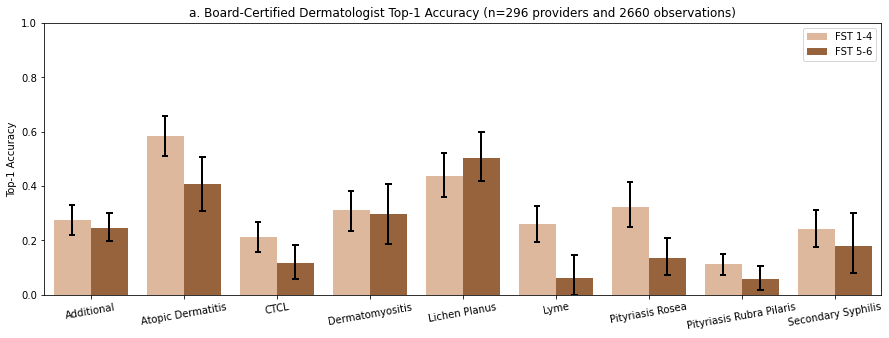

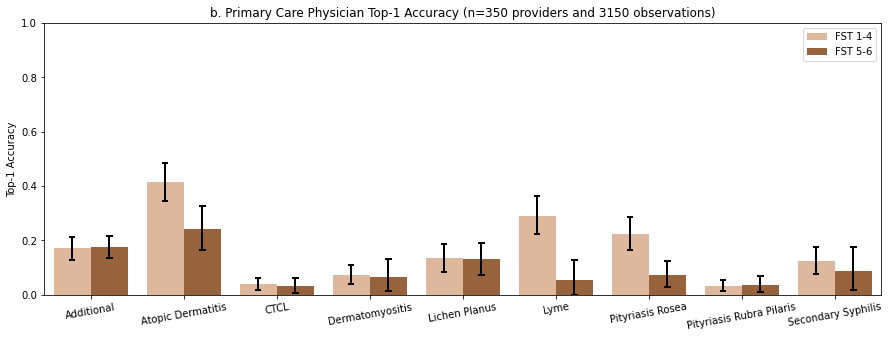

In [57]:
print(df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].user_id.nunique())
print(df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (df.time_created_guess<"2022-06-01")].user_id.nunique())

print(df[(df.physician_type=="PCP physician (MD or DO)")].user_id.nunique())
print(df[(df.physician_type=="PCP physician (MD or DO)") & (df.time_created_guess<"2022-06-01")].user_id.nunique())



def plotter(data,name,title, hue):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    if hue=="fitzpatrick":
        colors = [palette1, palette2, palette3, palette4, palette5, palette6]
    elif hue=="dark2":
        colors = [palette2,palette5]
    custom = sns.set_palette(sns.color_palette(colors))
    ax = sns.barplot(x="consensus_label_simplified", y="diff1",hue=hue,
                     hue_order=["FST 1-4","FST 5-6"],
                     data=data, 
                     alpha=.99,
                     errcolor="black", errwidth=2, capsize=.05,
                     order=["Additional", 'Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis',],
                     palette=custom)
    ax.set_ylabel("Top-1 Accuracy")
    ax.set_xlabel("")
    ax.set_title("{}".format(title))
    ax.set_xticklabels(["Additional", 'Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis'], rotation = 10)
    ax.legend(loc="upper right")
    ax.set_ylim(0,1)
    fig.set_size_inches(15, 5)
    fig.savefig("figs/f2_{}.png".format(name,hue),dpi=600, bbox_inches="tight")



plotter(bcd,"a_t1", 
        "a. Board-Certified Dermatologist Top-1 Accuracy (n={} providers and {} observations)".format(
            bcd.user_id.nunique(),bcd.shape[0])
        , "dark2")

plotter(pcp,"b_t1", "b. Primary Care Physician Top-1 Accuracy (n={} providers and {} observations)".format(
    pcp.user_id.nunique(),pcp.shape[0]), "dark2")

# plotter(other_p,"extra_op", "Other Physician Performance (n={} providers and {} observation)".format(
#     other_p.user_id.nunique(),other_p.shape[0]), "dark")

# plotter(d_res,"extra_dr", "Dermatology Resident Performance (n={} providers and {} observation)".format(
#     d_res.user_id.nunique(),d_res.shape[0]), "dark")

# Top 3 by Fitz

389
56
459
1


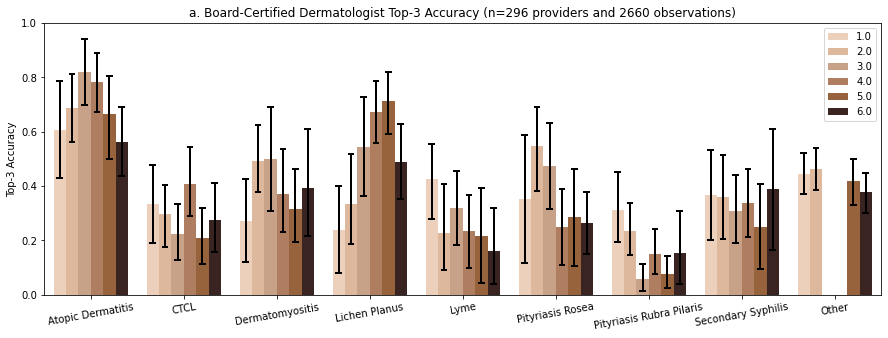

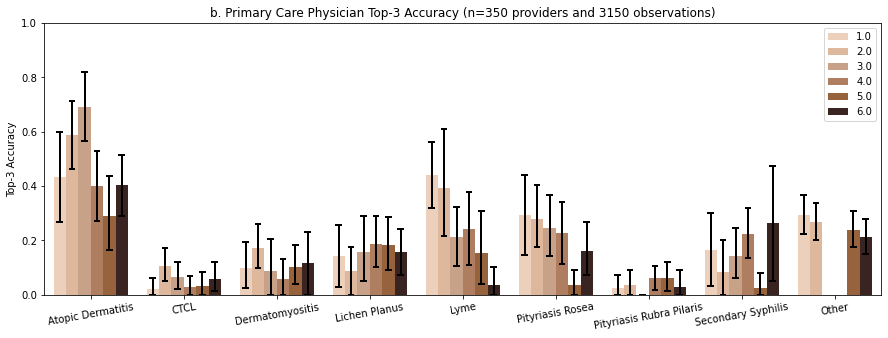

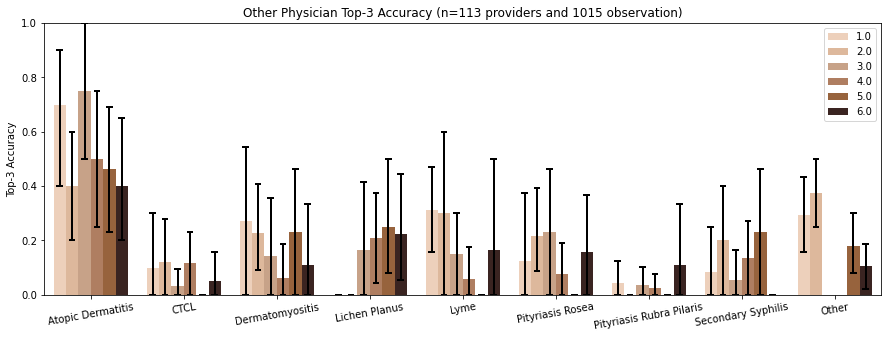

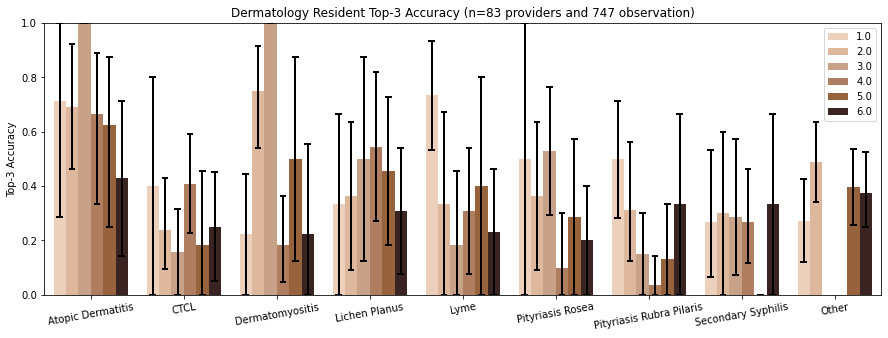

In [58]:
print(df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].user_id.nunique())
print(df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (df.time_created_guess<"2022-06-01")].user_id.nunique())

print(df[(df.physician_type=="PCP physician (MD or DO)")].user_id.nunique())
print(df[(df.physician_type=="PCP physician (MD or DO)") & (df.time_created_guess<"2022-06-01")].user_id.nunique())



def plotter(data,name,title, hue):

    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    if hue=="fitzpatrick":
        colors = [palette1, palette2, palette3, palette4, palette5, palette6]
    elif hue=="dark2":
        colors = [palette2,palette5]
    custom = sns.set_palette(sns.color_palette(colors))
    ax = sns.barplot(x="consensus_label_simplified", y="correct_diagnosis",hue=hue,
#                      hue_order=["FST 1-4","FST 5-6"],
                     data=data, 
                     alpha=.99,
                     errcolor="black", errwidth=2, capsize=.05,
                     order=['Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis',"Additional",],
                     palette=custom)
    ax.set_ylabel("Top-3 Accuracy")
    ax.set_xlabel("")
    ax.set_title("{}".format(title))
    ax.set_xticklabels([ 'Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
                            'Pityriasis Rosea', 
           'Pityriasis Rubra Pilaris',  
            'Secondary Syphilis', "Other"], rotation = 10)
    ax.legend(loc="upper right")
    ax.set_ylim(0,1)
    fig.set_size_inches(15, 5)
    fig.savefig("figs/x_{}.png".format(name,hue),dpi=600, bbox_inches="tight")



plotter(bcd,"a_1a_top3_fitzpatrick", 
        "a. Board-Certified Dermatologist Top-3 Accuracy (n={} providers and {} observations)".format(
            bcd.user_id.nunique(),bcd.shape[0])
        , "fitzpatrick")

plotter(pcp,"a_1c_top3_fitzpatrick", "b. Primary Care Physician Top-3 Accuracy (n={} providers and {} observations)".format(
    pcp.user_id.nunique(),pcp.shape[0]), "fitzpatrick")

plotter(other_p,"a_1d_top3_fitzpatrick", "Other Physician Top-3 Accuracy (n={} providers and {} observation)".format(
    other_p.user_id.nunique(),other_p.shape[0]), "fitzpatrick")

plotter(d_res,"a_1b_top3_fitzpatrick", "Dermatology Resident Top-3 Accuracy (n={} providers and {} observation)".format(
    d_res.user_id.nunique(),d_res.shape[0]), "fitzpatrick")

389
56
459
1
Mix of patients
Ttest_indResult(statistic=1.6861661559602024, pvalue=0.09224740391209721)
Mostly white patients
Ttest_indResult(statistic=-0.03078370138784998, pvalue=0.9754467530026029)
Mostly non-white patients
Ttest_indResult(statistic=1.1656550647849806, pvalue=0.2441743761015699)
Not applicable
Ttest_indResult(statistic=2.0199483442611044, pvalue=0.04964737008970019)
x
Mostly white patients
Ttest_indResult(statistic=3.398188996405091, pvalue=0.0006960869593523617)
Mix of patients
Ttest_indResult(statistic=-0.2533979410419278, pvalue=0.8000056587557611)
Mostly non-white patients
Ttest_indResult(statistic=0.45528461596557235, pvalue=0.6491391991074006)
Not applicable
Ttest_indResult(statistic=0.6666666666666666, pvalue=0.5094841095620081)
----Please select one----
Ttest_indResult(statistic=0.6740302630988926, pvalue=0.5064770753782168)


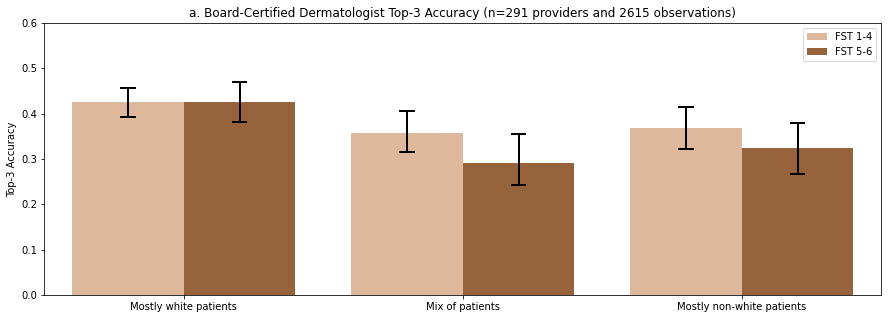

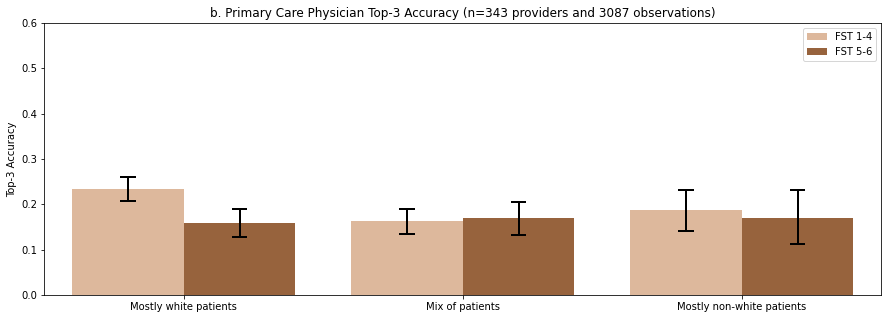

In [59]:
print(df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)")].user_id.nunique())
print(df[(df.physician_type=="Board-certified/board-eligible dermatologist (MD or DO)") & (df.time_created_guess<"2022-06-01")].user_id.nunique())

print(df[(df.physician_type=="PCP physician (MD or DO)")].user_id.nunique())
print(df[(df.physician_type=="PCP physician (MD or DO)") & (df.time_created_guess<"2022-06-01")].user_id.nunique())


bcd["pd2"] = bcd.patient_distribution
bcd.loc[bcd.patient_distribution=="All white patients", "pd2"] = "Mostly white patients"
bcd.loc[bcd.patient_distribution=="All patients with skin of color (non-white)", "pd2"] = "Mostly non-white patients"
bcd.loc[bcd.patient_distribution=="Mostly patients with skin of color (non-white)", "pd2"] = "Mostly non-white patients"
bcd.loc[bcd.patient_distribution=="About an equal portion of patients with skin of color (non-white) and white patients", "pd2"] = "Mix of patients"

pcp["pd2"] = pcp.patient_distribution
pcp.loc[pcp.patient_distribution=="All white patients", "pd2"] = "Mostly white patients"
pcp.loc[pcp.patient_distribution=="All patients with skin of color (non-white)", "pd2"] = "Mostly non-white patients"
pcp.loc[pcp.patient_distribution=="Mostly patients with skin of color (non-white)", "pd2"] = "Mostly non-white patients"
pcp.loc[pcp.patient_distribution=="About an equal portion of patients with skin of color (non-white) and white patients", "pd2"] = "Mix of patients"



def plotter(data,name,title, hue):
    colors = [palette2,palette4, palette6]
    if hue=="dark2":
        colors = [palette2,palette5]
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    custom = sns.set_palette(sns.color_palette(colors))
    ax = sns.barplot(x="pd2", y="correct_diagnosis",hue=hue,
                     hue_order=["FST 1-4","FST 5-6"],
                     data=data, 
                     alpha=.99,
                     errcolor="black", errwidth=2, capsize=.05,
                     order=["Mostly white patients", 'Mix of patients', 'Mostly non-white patients',],
                     palette=custom)
    ax.set_ylabel("Top-3 Accuracy")
    ax.set_xlabel("")
    ax.set_title("{}".format(title))
#     ax.set_xticklabels(["Additional", 'Atopic Dermatitis', 'CTCL', 'Dermatomyositis','Lichen Planus', 'Lyme',
#                             'Pityriasis Rosea', 
#            'Pityriasis Rubra Pilaris',  
#             'Secondary Syphilis'], rotation = 10)
    ax.legend(loc="upper right")
    ax.set_ylim(0,.6)
    fig.set_size_inches(15, 5)
    fig.savefig("figs/{}.png".format(name,hue),dpi=600, bbox_inches="tight")


for i in bcd.pd2.unique():
    print(i)
    print(stats.ttest_ind(
    bcd[(bcd.pd2==i) & (bcd.dark2=="FST 1-4")].correct_diagnosis,
    bcd[(bcd.pd2==i) & (bcd.dark2=="FST 5-6")].correct_diagnosis))
print("x")
for i in pcp.pd2.unique():
    print(i)
    print(stats.ttest_ind(
    pcp[(pcp.pd2==i) & (pcp.dark2=="FST 1-4")].correct_diagnosis,
    pcp[(pcp.pd2==i) & (pcp.dark2=="FST 5-6")].correct_diagnosis))
plotter(bcd[(bcd.pd2!='Not applicable') & (bcd.pd2!='----Please select one----')],"z_top3_distribution_bcd", 
        "a. Board-Certified Dermatologist Top-3 Accuracy (n={} providers and {} observations)".format(
            bcd[(bcd.pd2!='Not applicable') & (bcd.pd2!='----Please select one----')].user_id.nunique(),bcd[(bcd.pd2!='Not applicable') & (bcd.pd2!='----Please select one----')].shape[0])
        , "dark2")

plotter(pcp[(pcp.pd2!='Not applicable') & (pcp.pd2!='----Please select one----')],"z_top3_distribution_pcp", "b. Primary Care Physician Top-3 Accuracy (n={} providers and {} observations)".format(
    pcp[(pcp.pd2!='Not applicable') & (pcp.pd2!='----Please select one----')].user_id.nunique(),pcp[(pcp.pd2!='Not applicable') & (pcp.pd2!='----Please select one----')].shape[0]), "dark2")

# The End